# CSCA 5622 Supervised Learning Final Project - Telecom Churn Prediction


# Problem Statement

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business
goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, we try to analyze customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn.

The goal is to build a machine learning model that is able to predict churning customers based on the features provided for their usage. This is a classification problem.

## Dataset
For this project I am using a public data set from a Kaggle Hackaton.Below is the link to the data:

Citation \
Tannu Jain, Tejaswini Ravinder, Upgrad. (2022). Telecom Churn Case Study Hackathon. Kaggle. \
https://kaggle.com/competitions/telecom-churn-case-study-hackathon-c42

### Description
**Files**
- train.csv - the training set
- test.csv - the test set
- data_dictionary.csv - supplemental information about the data

**Columns**
- example_id - definition of example_id
- feature_1 - definition of feature_1
etc.

**Data_Dictionary**
| Acronyms | Description                                                                 |
|----------|-----------------------------------------------------------------------------|
| CIRCLE_ID | Telecom circle area to which the customer belongs to                        |
| LOC      | Local calls within the same telecom circle                                  |
| STD      | STD calls outside the calling circle                                        |
| IC       | Incoming calls                                                              |
| OG       | Outgoing calls                                                              |
| T2T      | Operator T to T i.e., within the same operator mobile to mobile             |
| T2M      | Operator T to other operator mobile                                         |
| T2O      | Operator T to other operator fixed line                                     |
| T2F      | Operator T to fixed lines of T                                              |
| T2C      | Operator T to its own call center                                           |
| ARPU     | Average revenue per user                                                    |
| MOU      | Minutes of usage for voice calls                                            |
| AON      | Age on network; number of days the customer is using the operator T network |
| ONNET    | All kinds of calls within the same operator network                         |
| OFFNET   | All kinds of calls outside the operator T network                           |
| ROAM     | Indicates that the customer is in a roaming zone during the call            |
| SPL      | Special calls                                                               |
| ISD      | ISD calls                                                                   |
| RECH     | Recharge                                                                    |
| NUM      | Number                                                                      |
| AMT      | Amount in local currency                                                    |
| MAX      | Maximum                                                                     |
| DATA     | Mobile internet                                                             |
| 3G       | 3G network                                                                  |
| AV       | Average                                                                     |
| VOL      | Mobile internet usage volume in MB                                          |
| 2G       | 2G network                                                                  |
| PCK      | Prepaid service schemes called PACKS                                        |
| NIGHT    | Scheme to use during specific night hours only                              |
| MONTHLY  | Service schemes with validity equivalent to a month                         |
| SACHET   | Service schemes with validity smaller than a month                          |
| *.6      | KPI for the month of June                                                   |
| *.7      | KPI for the month of July                                                   |
| *.8      | KPI for the month of August                                                 |
| FB_USER  | Service scheme to avail services of Facebook and similar social networking sites |
| VBC      | Volume-based cost when no specific scheme is purchased and paid as per usage |


# Importing Necessary Libraries

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTENC
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)

# Importing and Analysing Data

In [2]:
# read data
churn_train = pd.read_csv("train.csv")
churn_test = pd.read_csv("test.csv")

In [3]:
churn_train.shape

(69999, 172)

In [4]:
churn_test.shape # This test data does not have any labels and was meant to be checked against some hidden dataset on Kaggle. For our analysis, we will ignore this data for now.

(30000, 171)

In [5]:
# look at initial rows of the data
churn_train.head(10)

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.00,0.00,0.00,0.00,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.00,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.00,0.00,0.00,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.00,0.00,0.00,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,

In [6]:
# feature type summary
churn_train.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

In [7]:
# look at data statistics
churn_train.describe(include='all')

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999,69600,69266,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,68898,68765,67538,69999.000000,69999.000000

In [8]:
#Take a look at data dictionary
data_dictionary = pd.read_csv('data_dictionary.csv')
data_dictionary

,Acronyms,Description
0,CIRCLE_ID,Telecom circle area to which the customer belo...
1,LOC,Local calls within same telecom circle
2,STD,STD calls outside the calling circle
3,IC,Incoming calls
4,OG,Outgoing calls
5,T2T,Operator T to T ie within same operator mobile...
6,T2M,Operator T to other operator mobile
7,T2O,Operator T to other operator fixed line
8,T2F,Operator T to fixed lines of T
9,T2C,Operator T to its own call center


# Data Cleaning and EDA

In [9]:
# Remove id column
churn_train.drop(labels = 'id', axis = 1, inplace = True)
churn_train.shape

(69999, 171)

In [10]:
# Rename column names for consistency
rename_dict = {'jun_vbc_3g' : 'vbc_3g_6', 'jul_vbc_3g' : 'vbc_3g_7', 'aug_vbc_3g' : 'vbc_3g_8',
             'og_others_6' : 'og_others_mou_6', 'og_others_7' : 'og_others_mou_7', 'og_others_8' : 'og_others_mou_8',
             'ic_others_6' : 'ic_others_mou_6', 'ic_others_7' : 'ic_others_mou_7', 'ic_others_8' : 'ic_others_mou_8'}
churn_train = churn_train.rename(rename_dict, axis=1)

In [11]:
# list the columns with 'date' in its name
date_col = [i for i in churn_train.columns.to_list() if 'date' in i]
date_col

['last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8']

In [12]:
# Lets remove these columns as date column may not be a good predictor for customer on montly basis
churn_train.drop(labels = date_col, axis = 1, inplace = True)

# Handling missing values

In [13]:
# look at missing value 
missing_data = round(100*(churn_train.isnull().sum()/len(churn_train.index)),2).sort_values(ascending=False)
# List columns where missing data is greater that 0%
missing_data.loc[missing_data>0]

total_rech_data_6     74.90
arpu_2g_6             74.90
arpu_3g_6             74.90
fb_user_6             74.90
night_pck_user_6      74.90
av_rech_amt_data_6    74.90
max_rech_data_6       74.90
count_rech_3g_6       74.90
count_rech_2g_6       74.90
count_rech_2g_7       74.48
fb_user_7             74.48
night_pck_user_7      74.48
total_rech_data_7     74.48
max_rech_data_7       74.48
arpu_3g_7             74.48
arpu_2g_7             74.48
count_rech_3g_7       74.48
av_rech_amt_data_7    74.48
fb_user_8             73.69
arpu_3g_8             73.69
max_rech_data_8       73.69
arpu_2g_8             73.69
count_rech_2g_8       73.69
av_rech_amt_data_8    73.69
total_rech_data_8     73.69
count_rech_3g_8       73.69
night_pck_user_8      73.69
loc_ic_t2f_mou_8       5.29
spl_og_mou_8           5.29
og_others_mou_8        5.29
isd_og_mou_8           5.29
loc_ic_t2t_mou_8       5.29
std_ic_mou_8           5.29
loc_ic_mou_8           5.29
std_ic_t2t_mou_8       5.29
std_ic_t2m_mou_8    

**There are lot of the columns in the dataset which have very high % of missing values.**

In [14]:
#  Listing columns with at least one null value for further exploration
churn_train.columns[churn_train.isnull().any()]

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'onnet_mou_6',
       'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7',
       'offnet_mou_8', 'roam_ic_mou_6',
       ...
       'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6',
       'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7',
       'fb_user_8'],
      dtype='object', length=117)

In [15]:
# Listing columns with 'mou'
mou_col = [i for i in churn_train.columns.to_list() if 'mou' in i]
mou_col

['loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_mou_6',
 'og_oth

In [16]:
# Next lets try to understand min and max values of these columns
churn_train[mou_col].describe()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_mou_6,og_others_mou_7,og_others_mou_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_mou_6,ic_others_mou_7,ic_others_mou_8
count,69297.0,69297.0,69297.0,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000
mean,0.0,0.0,0.0,133.153275,133.894438,132.978257,198.874771,197.153383,196.543577,9.765435,7.014568,7.004892,14.186457,9.842191,9.771783,46.904854,46.166503,45.686109,93.238231,90.799240,91.121447,3.743179,3.777031,3.661652,1.126025,1.361052,1.420840,143.893585,140.750120,140.476486,80.619382,83.775851,83.471486,88.152110,91.538615,90.586999,1.126377,1.084062,1.057739,0.0,0.0,0.0,169.900601,176.401217,175.118852,0.845763,0.811100,0.841648,3.958619,4.976783,5.045027,0.462581,0.024425,0.033059,306.451436,310.572674,304.513065,48.043255,47.882736,47.256388,107.152439,106.489856,108.154731,12.050672,12.563665,11.716763,167.255126,166.945103,167.136761,9.476958,9.873468,9.910217,20.734858,21.685359,21.089042,2.146273,2.199395,2.075179,0.0,0.0,0.0,32.360632,33.760809,33.077030,199.710640,201.878029,198.486034,0.061932,0.033371,0.040392,7.394167,8.171162,8.348424,0.854063,1.019680,0.963214
std,0.0,0.0,0.0,299.963093,311.277193,311.896596,316.818355,322.482226,324.089234,57.374429,55.960985,53.408135,73.469261,58.511894,64.618388,150.971758,154.739002,153.716880,162.046699,153.852597,152.997805,13.319542,13.568110,13.009193,5.741811,7.914113,6.542202,252.034597,246.313148,245.342359,255.098355,266.693254,267.021929,255.771554,267.532089,270.032002,8.136645,8.325206,7.696853,0.0,0.0,0.0,392.046600,409.299501,4

**Minimum value in all mou columns is 0 which means the customer didn't initiate a call. Rather than dropping missing data for these columns we can impute the missing values to zero.**

In [17]:
# Imputing missing values to zero for mou columns
for col in mou_col:
    churn_train[col].fillna(0.00, inplace=True)

In [18]:
# Next lets look for unique values in few other columns with missing data
user_col = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']
for col in user_col:
    print(churn_train[col].value_counts())

0.0    17124
1.0      444
Name: night_pck_user_6, dtype: int64
0.0    17435
1.0      430
Name: night_pck_user_7, dtype: int64
0.0    18030
1.0      387
Name: night_pck_user_8, dtype: int64
1.0    16098
0.0     1470
Name: fb_user_6, dtype: int64
1.0    16249
0.0     1616
Name: fb_user_7, dtype: int64
1.0    16397
0.0     2020
Name: fb_user_8, dtype: int64


**Looks like this is categorical data. No way to predict what the customer has chosen so there is no way to reliably impute missing values.**

In [19]:
# look at missing value 
missing_data = round(100*(churn_train[user_col].isnull().sum()/len(churn_train.index)),2).sort_values(ascending=False)
# List columns where missing data is greater that 0%
missing_data.loc[missing_data>0]

night_pck_user_6    74.90
fb_user_6           74.90
night_pck_user_7    74.48
fb_user_7           74.48
night_pck_user_8    73.69
fb_user_8           73.69
dtype: float64

**All these columns also seem to have a lot of missing values. It makes sense to drop these columns**

In [20]:
churn_train.drop(labels = user_col, axis = 1, inplace = True)

In [21]:
# Lets take a look at few rech_data columns with high percentage of missing data

rech_data_col = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7',
                   'max_rech_data_8']
churn_train[rech_data_col].describe()

,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8
count,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000
mean,2.467612,2.679989,2.652441,126.500000,126.402071,125.374925
std,2.794610,3.073472,3.101265,109.352573,109.459266,109.648799
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,25.000000,25.000000,25.000000
50%,1.000000,2.000000,1.000000,145.000000,145.000000,145.000000
75%,3.000000,3.000000,3.000000,177.000000,177.000000,179.000000
max,61.000000,54.000000,60.000000,1555.000000,1555.000000,1555.000000


In [22]:
# Lets remove these columns too as missing % is high
churn_train.drop(labels = rech_data_col, axis = 1, inplace = True)

In [23]:
# Next we take a look at the av_rech_col columns with high percentage of missing data
av_rech_col = ['av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8']
churn_train[av_rech_col].describe()

,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8
count,17568.000000,17865.000000,18417.000000
mean,192.831096,201.455940,196.815792
std,190.623115,198.346141,192.280532
min,1.000000,1.000000,1.000000
25%,82.000000,92.000000,84.000000
50%,154.000000,154.000000,154.000000
75%,252.000000,252.000000,252.000000
max,5920.000000,4365.000000,4076.000000


**We can assume that average recharge amount for missing cases is zero**

In [24]:
# Impute zero for missing values
for col in av_rech_col:
    churn_train[col].fillna(0, inplace=True)

In [25]:
# Count of recharge may not be a good predictor of churn as we are only interested in total recharge amount.Lets drop these columns
count_rech_col = ['count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7',
                   'count_rech_3g_8']
churn_train.drop(labels = count_rech_col, axis = 1, inplace = True)

In [26]:
# look at missing value 
missing_data = round(100*(churn_train.isnull().sum()/len(churn_train.index)),2).sort_values(ascending=False)
# List columns where missing data is greater that 0%
missing_data.loc[missing_data>0]

arpu_2g_6    74.90
arpu_3g_6    74.90
arpu_2g_7    74.48
arpu_3g_7    74.48
arpu_2g_8    73.69
arpu_3g_8    73.69
dtype: float64

In [27]:
# Next lets take a look at the arpu columns with high % of missing data
arpu_col = ['arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8']
churn_train[arpu_col].describe()

,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8
count,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000
mean,90.069931,89.115767,90.618564,86.863900,85.846074,86.348404
std,193.600413,195.826990,189.907986,171.321203,178.067280,170.297094
min,-20.380000,-26.040000,-24.490000,-35.830000,-13.090000,-55.830000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.520000,0.420000,0.840000,11.300000,8.800000,9.090000
75%,122.070000,120.860000,122.070000,122.070000,122.070000,122.070000
max,5054.370000,4980.900000,3716.900000,5054.350000,4809.360000,3483.170000


**It looks like we can't impute missing values here. Lets drop these columns.**

In [28]:
# Dropping above columns
churn_train.drop(labels = arpu_col, axis = 1, inplace = True)

In [29]:
# look at missing value 
missing_data = round(100*(churn_train.isnull().sum()/len(churn_train.index)),2).sort_values(ascending=False)
# List columns where missing data is greater that 0%
missing_data.loc[missing_data>0]

Series([], dtype: float64)

**There are no columns with missing values now**

**Next we look for columns which have only 1 unique values. Such columns have zero variance and therefore do not contribute to
the model. Such columns can be safely dropped.**

In [30]:
var_col=[]
for col in churn_train.columns:
    length = len(churn_train[col].unique())
    if length <= 1:
        var_col.append(col)
# Dropping above columns
churn_train.drop(labels = var_col, axis = 1, inplace = True)

In [31]:
churn_train.shape

(69999, 128)

# filter high-value customers

**Lets restrict our analysis to only high value customer.**

**A high value customer here is one who has recharged with an amount greater than or equal to the 70th percentile of average recharge amount in first two months**

In [32]:
# Get average of total recharge done for month 6 and 7
churn_train['avg_rech_amt_6_7'] = churn_train[['total_rech_amt_6', 'total_rech_amt_7', 'av_rech_amt_data_6','av_rech_amt_data_7']].mean(axis=1)

In [33]:
# Get 70th percentile as the threshold
thresh = churn_train['avg_rech_amt_6_7'].quantile(0.70)
print("Recharge amount at 70th percentile: {0}".format(thresh))

Recharge amount at 70th percentile: 215.5


In [34]:
#filter hvc customers
churn_train_hvc = churn_train[churn_train['avg_rech_amt_6_7'] > thresh]

In [35]:
# Drop average column created only to filter hvc customers
churn_train_hvc.drop(labels = 'avg_rech_amt_6_7', axis = 1, inplace = True)

In [36]:
# Check remaining records
churn_train_hvc.shape

(20995, 128)

**Since this is a classification problem, lets take a look at the churn class to check if we have ample samples for each class to train the model properly.**

In [37]:
churn_class_perc= round(100*(churn_train_hvc['churn_probability'].mean()),2)
churn_class_perc

8.38

This is very low indicating class imbalance. We need to address this to train the model properly

## Univariate analysis

<Axes: xlabel='arpu_6'>

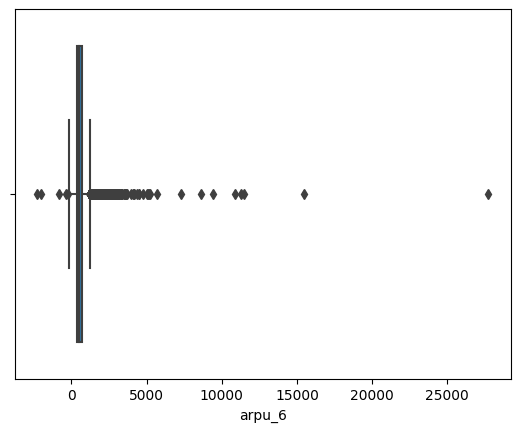

<Axes: xlabel='arpu_7'>

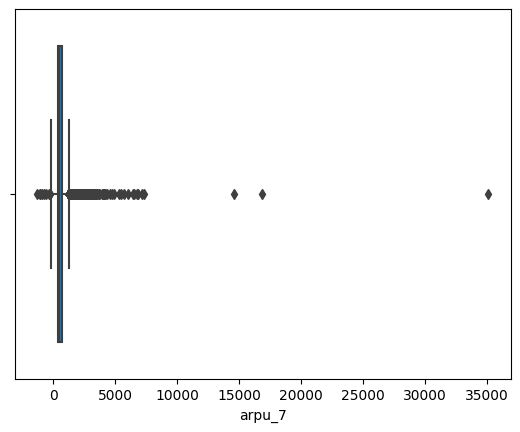

<Axes: xlabel='arpu_8'>

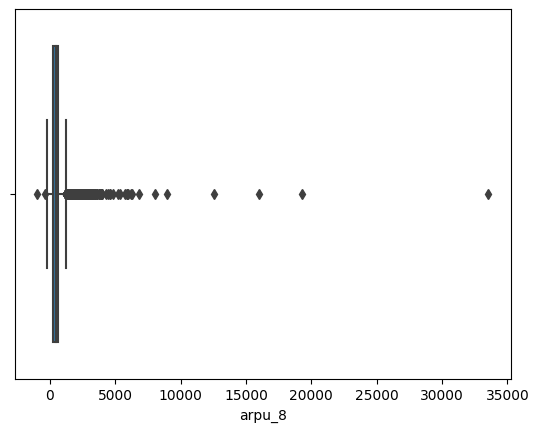

<Axes: xlabel='onnet_mou_6'>

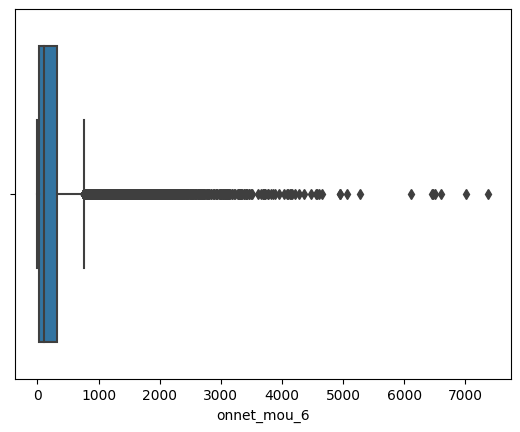

<Axes: xlabel='onnet_mou_7'>

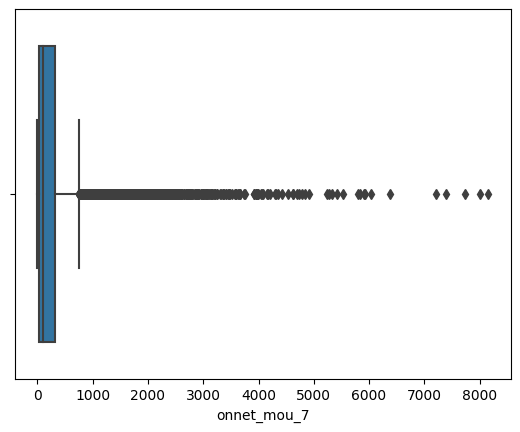

<Axes: xlabel='onnet_mou_8'>

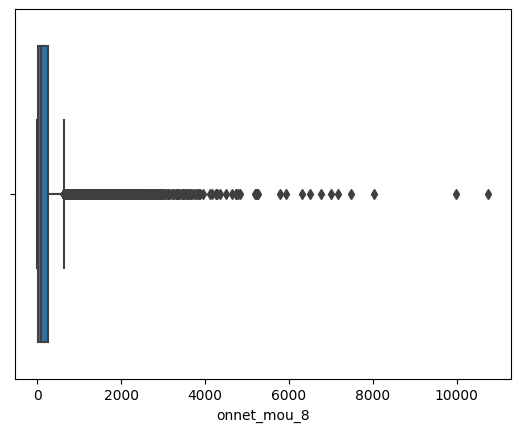

<Axes: xlabel='offnet_mou_6'>

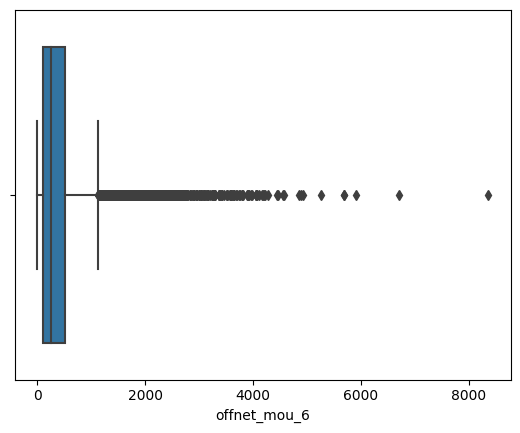

<Axes: xlabel='offnet_mou_7'>

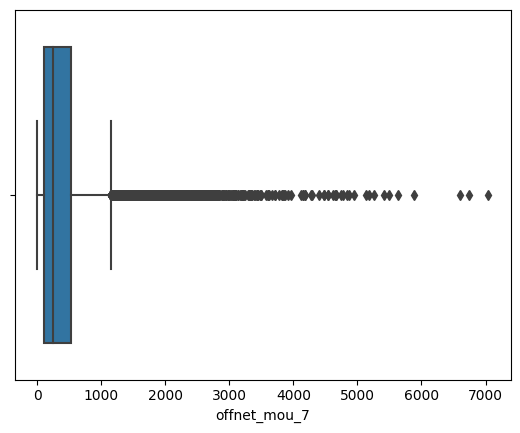

<Axes: xlabel='offnet_mou_8'>

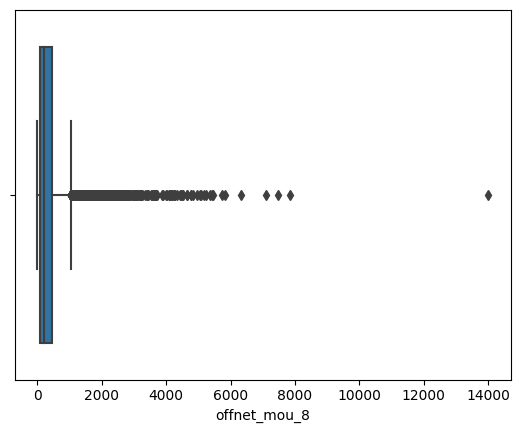

<Axes: xlabel='roam_ic_mou_6'>

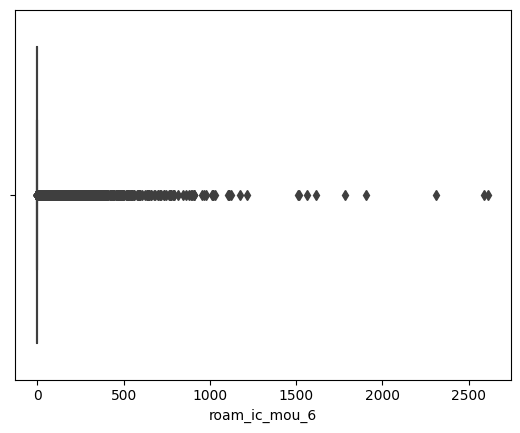

<Axes: xlabel='roam_ic_mou_7'>

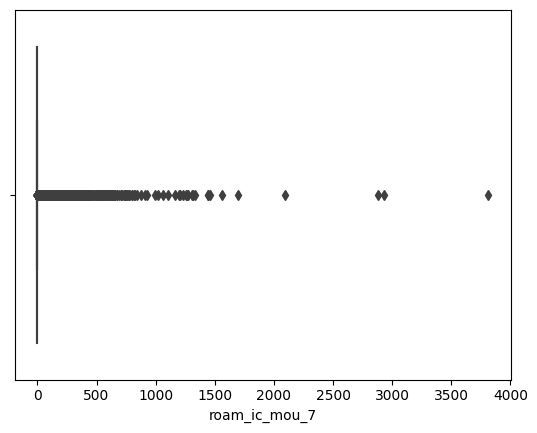

<Axes: xlabel='roam_ic_mou_8'>

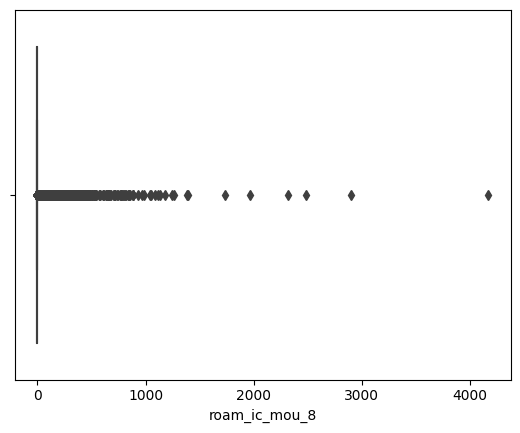

<Axes: xlabel='roam_og_mou_6'>

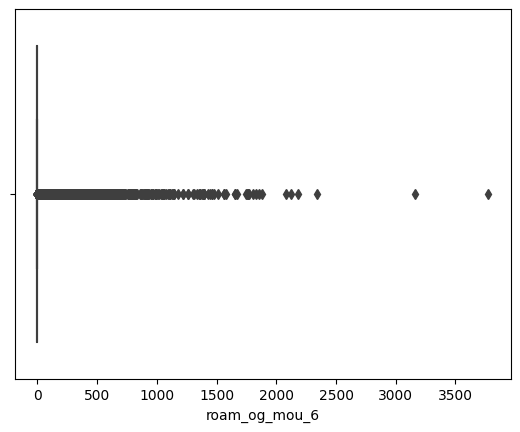

<Axes: xlabel='roam_og_mou_7'>

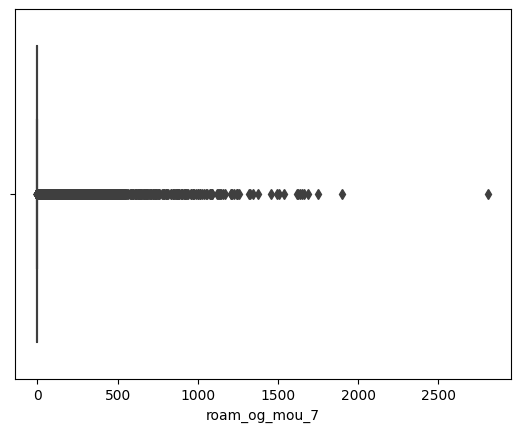

<Axes: xlabel='roam_og_mou_8'>

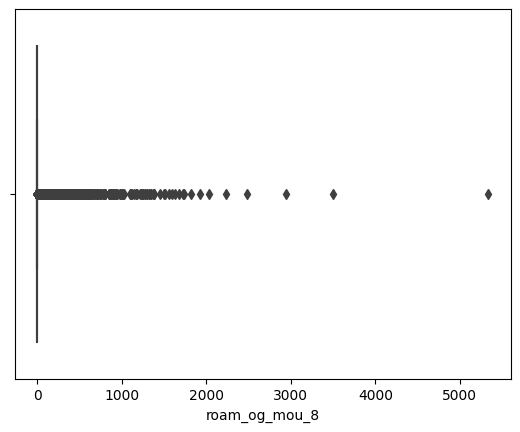

<Axes: xlabel='loc_og_t2t_mou_6'>

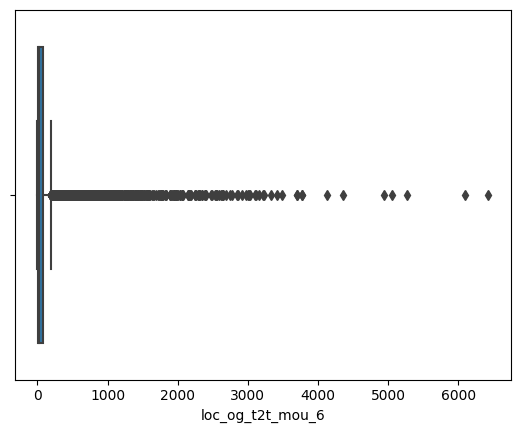

<Axes: xlabel='loc_og_t2t_mou_7'>

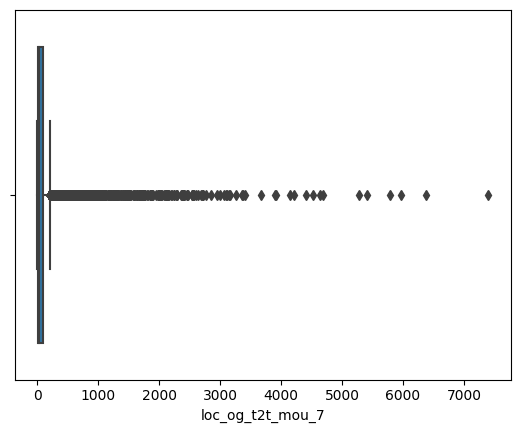

<Axes: xlabel='loc_og_t2t_mou_8'>

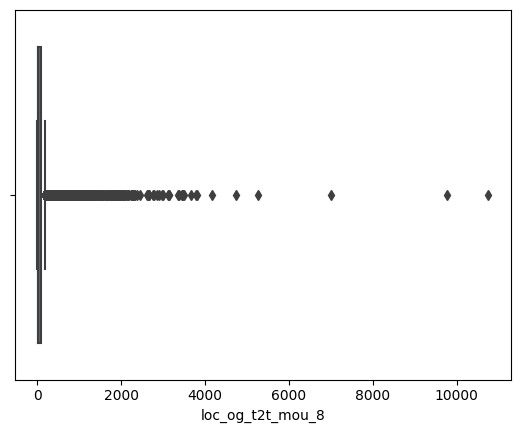

<Axes: xlabel='loc_og_t2m_mou_6'>

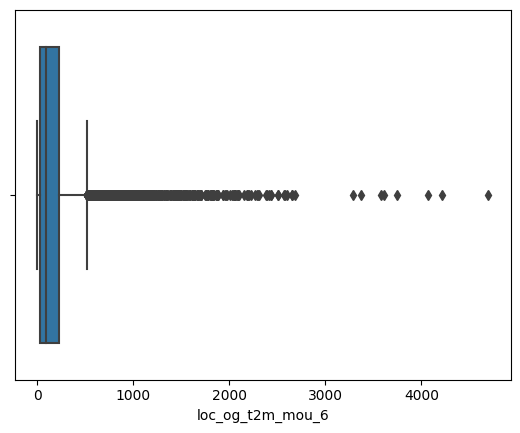

<Axes: xlabel='loc_og_t2m_mou_7'>

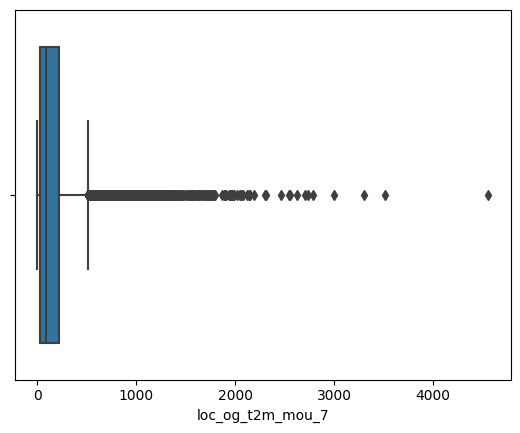

<Axes: xlabel='loc_og_t2m_mou_8'>

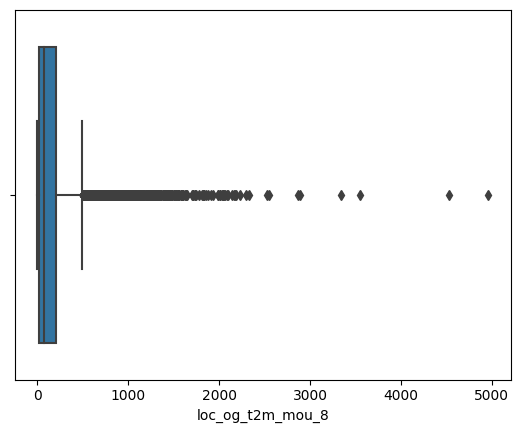

<Axes: xlabel='loc_og_t2f_mou_6'>

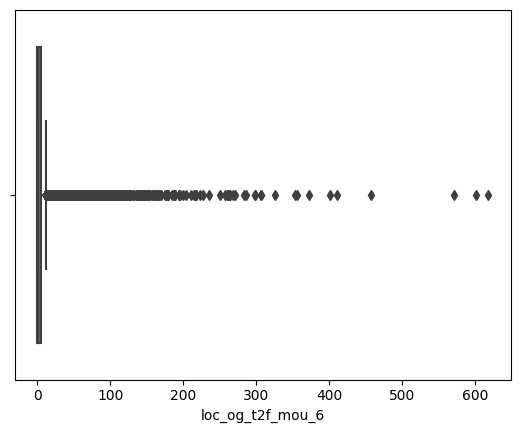

<Axes: xlabel='loc_og_t2f_mou_7'>

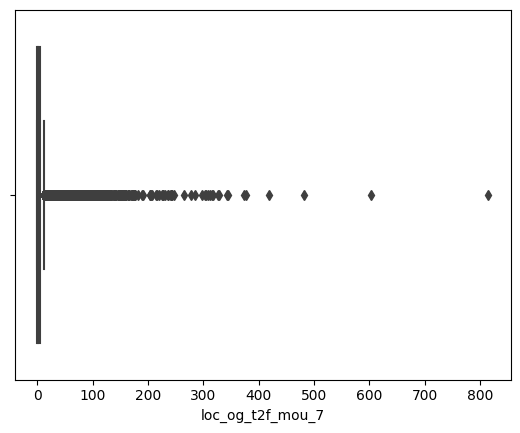

<Axes: xlabel='loc_og_t2f_mou_8'>

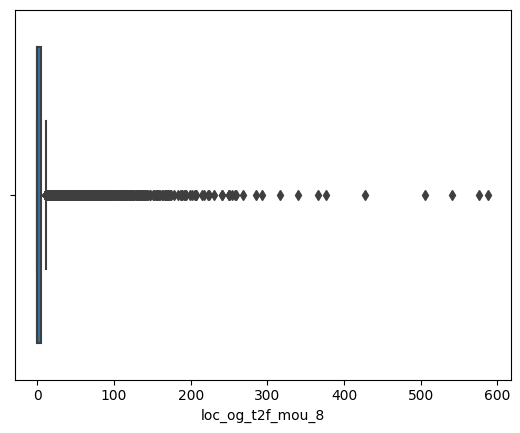

<Axes: xlabel='loc_og_t2c_mou_6'>

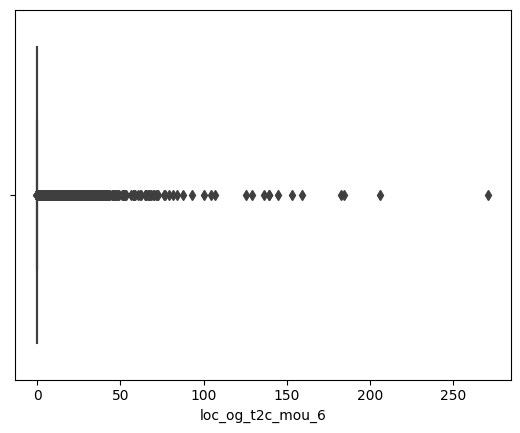

<Axes: xlabel='loc_og_t2c_mou_7'>

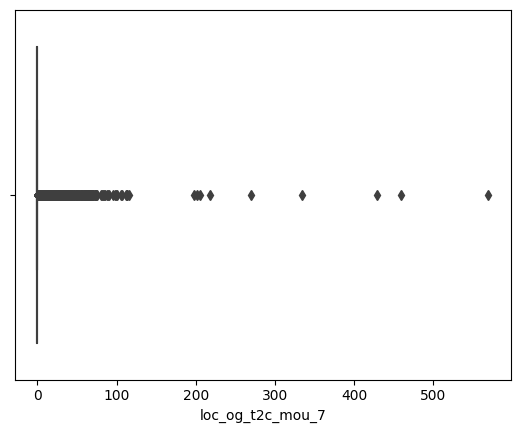

<Axes: xlabel='loc_og_t2c_mou_8'>

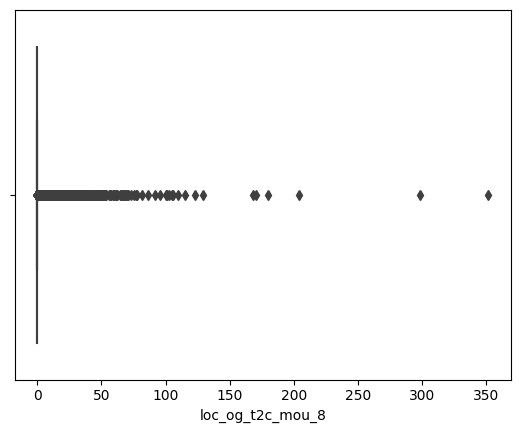

<Axes: xlabel='loc_og_mou_6'>

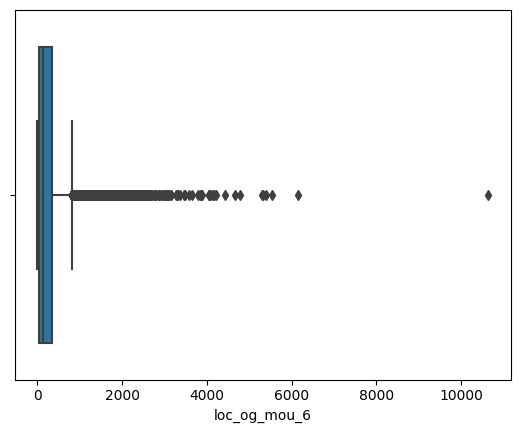

<Axes: xlabel='loc_og_mou_7'>

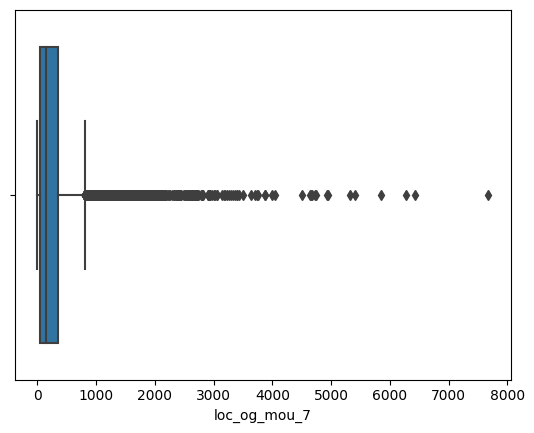

<Axes: xlabel='loc_og_mou_8'>

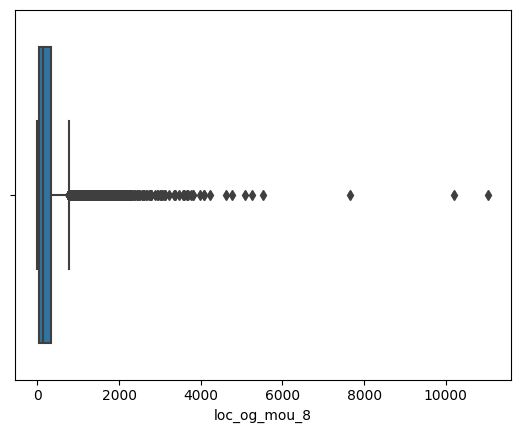

<Axes: xlabel='std_og_t2t_mou_6'>

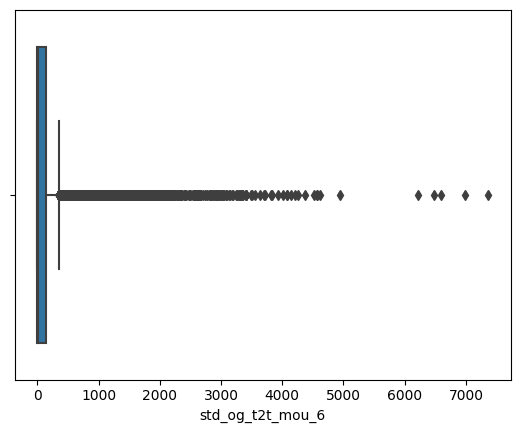

<Axes: xlabel='std_og_t2t_mou_7'>

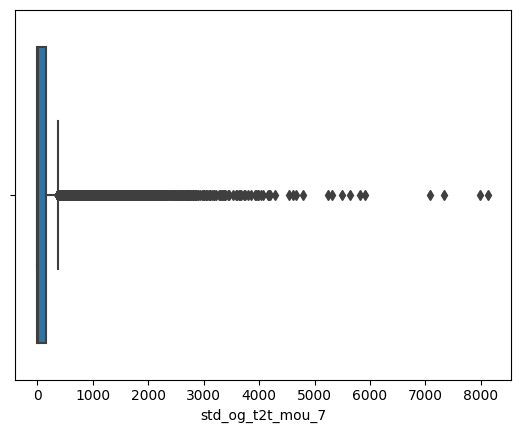

<Axes: xlabel='std_og_t2t_mou_8'>

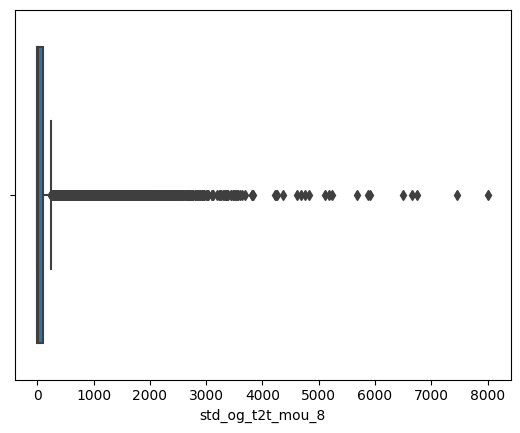

<Axes: xlabel='std_og_t2m_mou_6'>

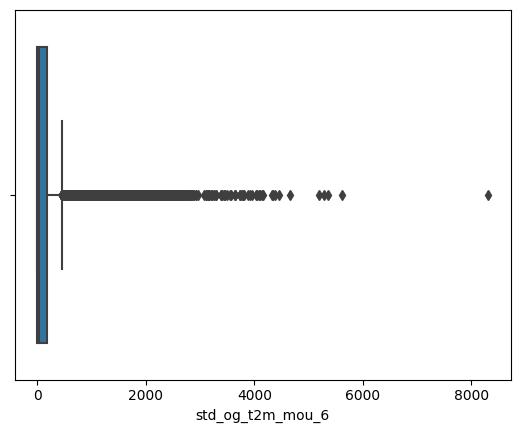

<Axes: xlabel='std_og_t2m_mou_7'>

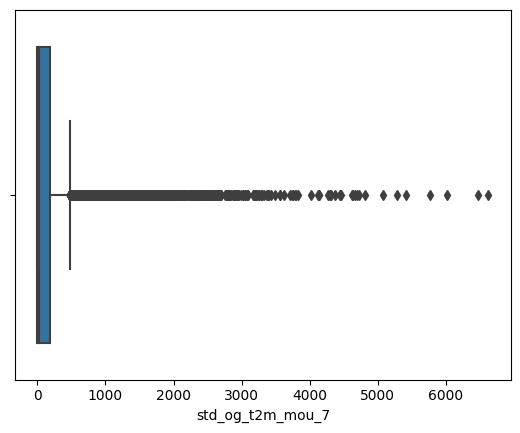

<Axes: xlabel='std_og_t2m_mou_8'>

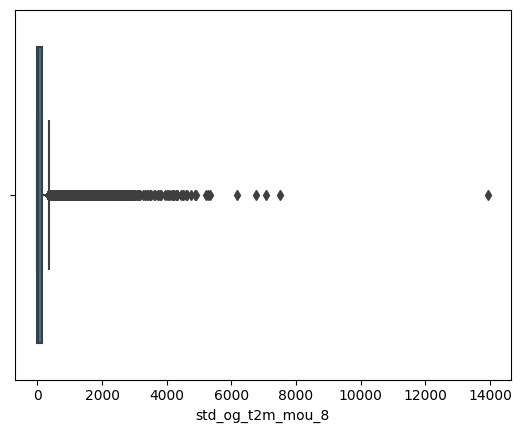

<Axes: xlabel='std_og_t2f_mou_6'>

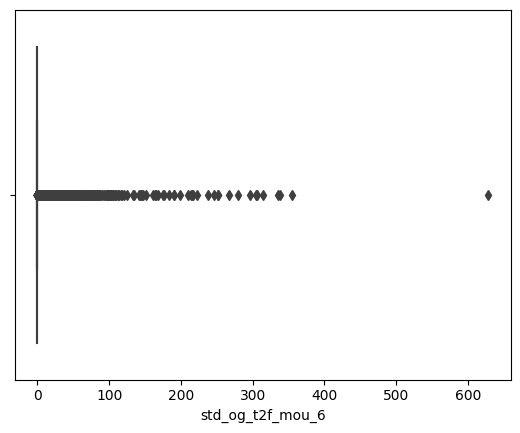

<Axes: xlabel='std_og_t2f_mou_7'>

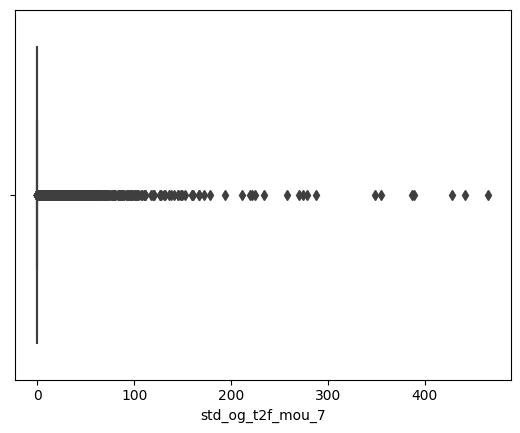

<Axes: xlabel='std_og_t2f_mou_8'>

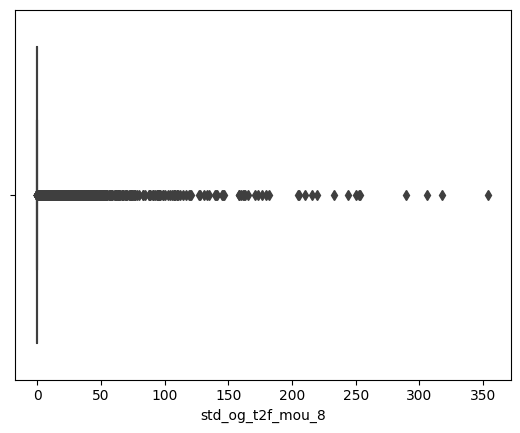

<Axes: xlabel='std_og_mou_6'>

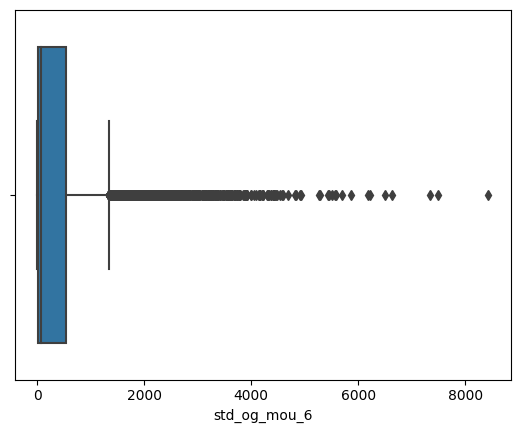

<Axes: xlabel='std_og_mou_7'>

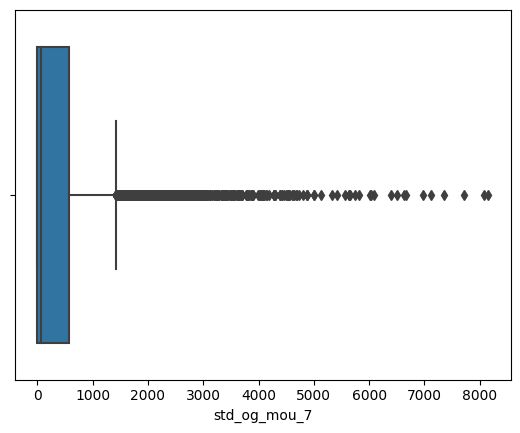

<Axes: xlabel='std_og_mou_8'>

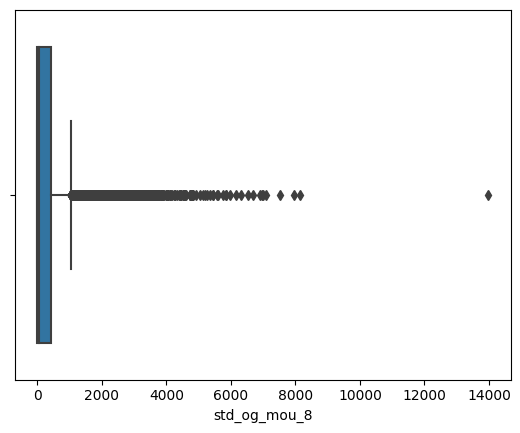

<Axes: xlabel='isd_og_mou_6'>

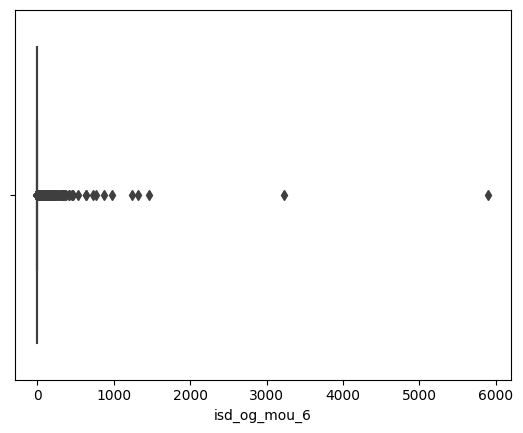

<Axes: xlabel='isd_og_mou_7'>

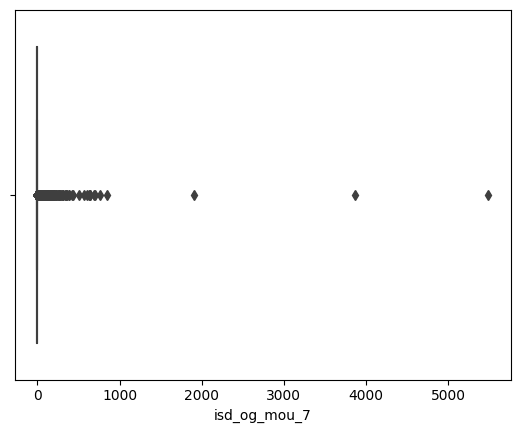

<Axes: xlabel='isd_og_mou_8'>

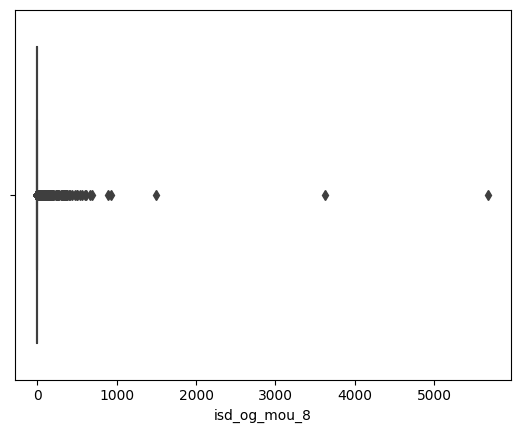

<Axes: xlabel='spl_og_mou_6'>

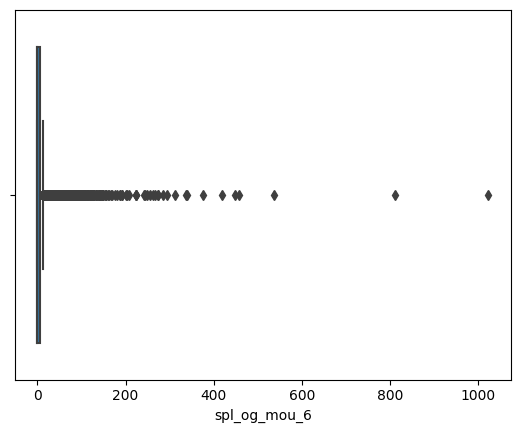

<Axes: xlabel='spl_og_mou_7'>

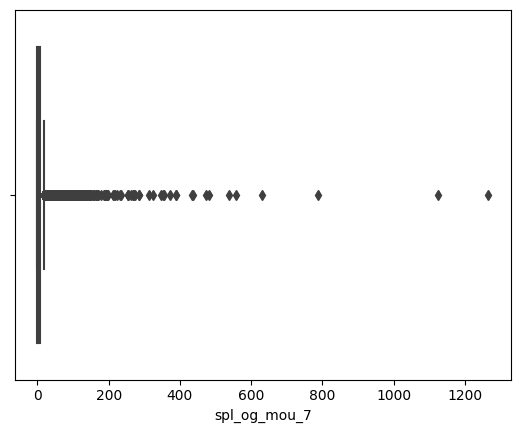

<Axes: xlabel='spl_og_mou_8'>

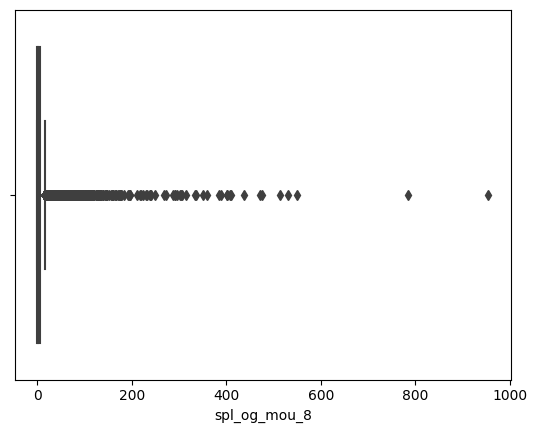

<Axes: xlabel='og_others_mou_6'>

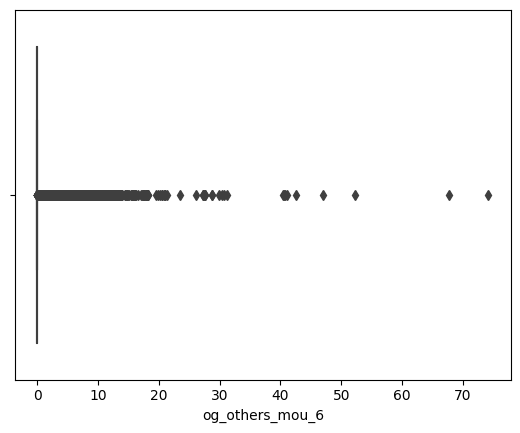

<Axes: xlabel='og_others_mou_7'>

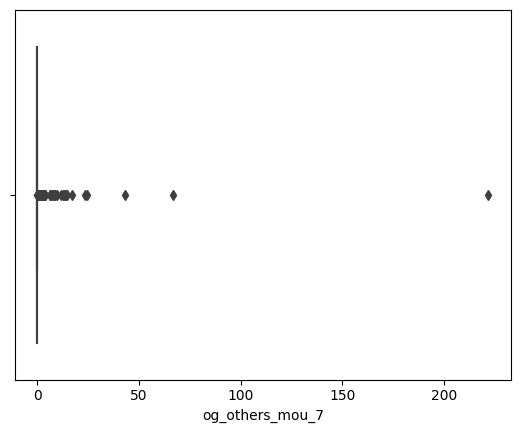

<Axes: xlabel='og_others_mou_8'>

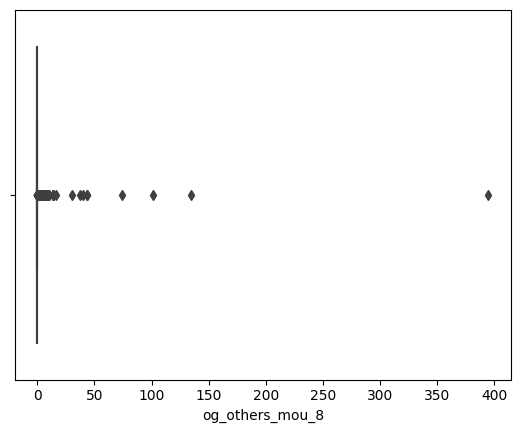

<Axes: xlabel='total_og_mou_6'>

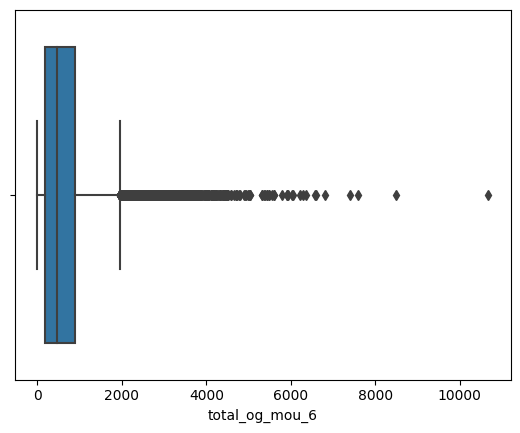

<Axes: xlabel='total_og_mou_7'>

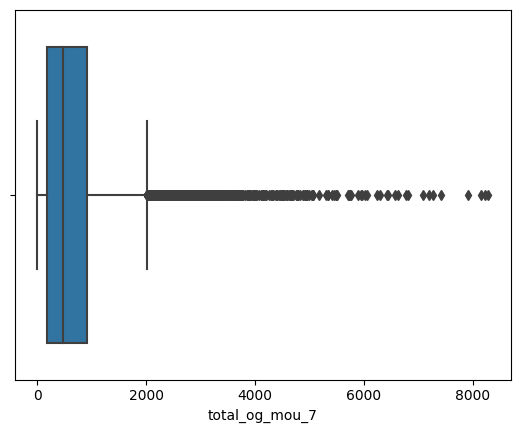

<Axes: xlabel='total_og_mou_8'>

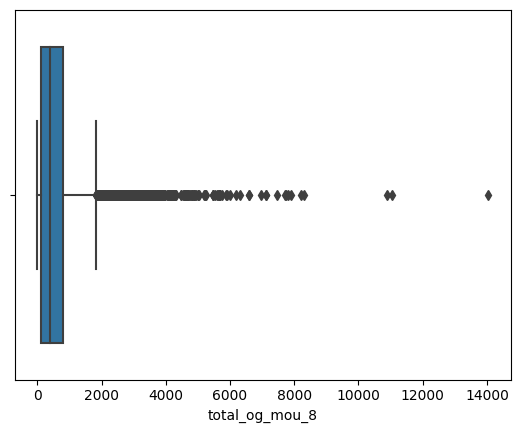

<Axes: xlabel='loc_ic_t2t_mou_6'>

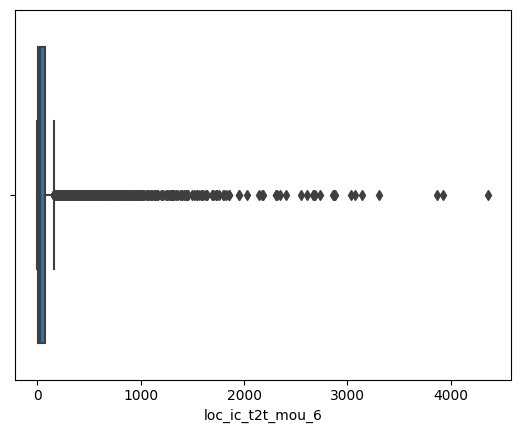

<Axes: xlabel='loc_ic_t2t_mou_7'>

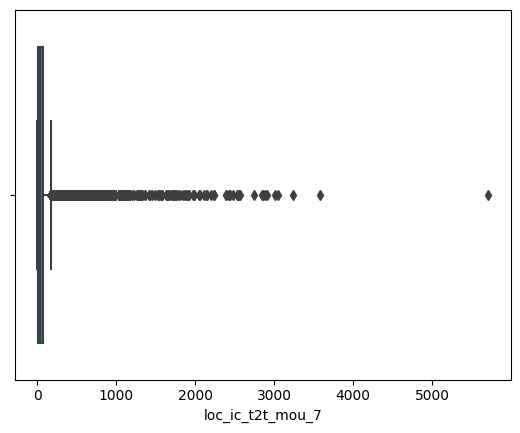

<Axes: xlabel='loc_ic_t2t_mou_8'>

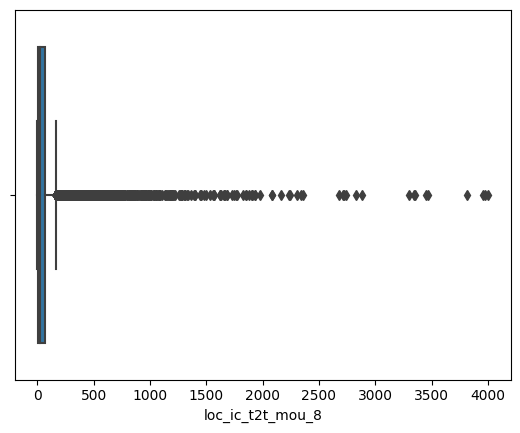

<Axes: xlabel='loc_ic_t2m_mou_6'>

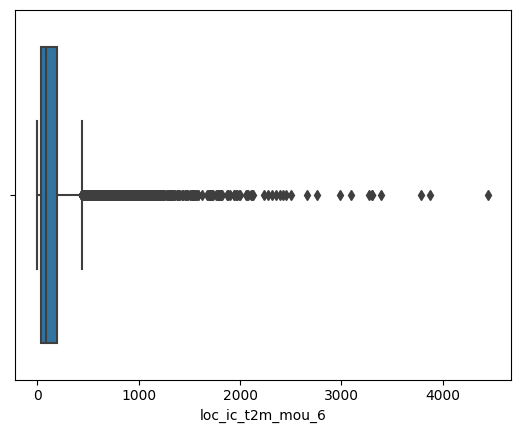

<Axes: xlabel='loc_ic_t2m_mou_7'>

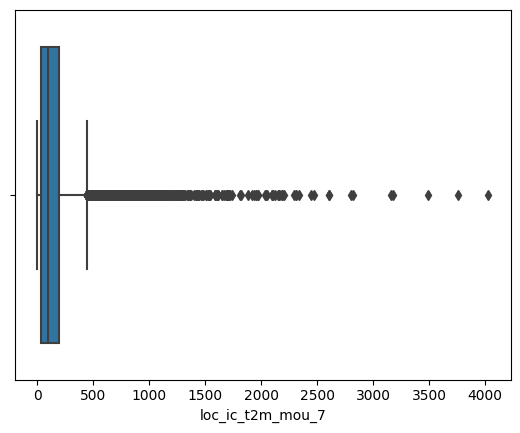

<Axes: xlabel='loc_ic_t2m_mou_8'>

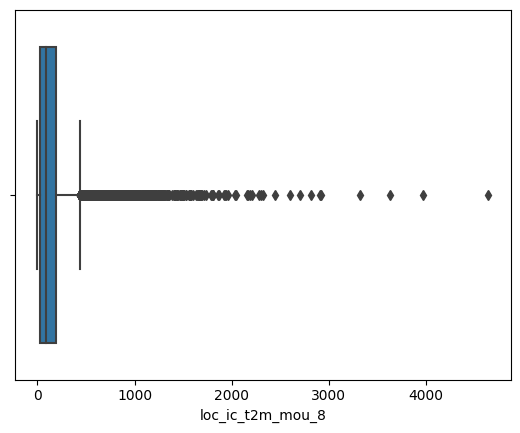

<Axes: xlabel='loc_ic_t2f_mou_6'>

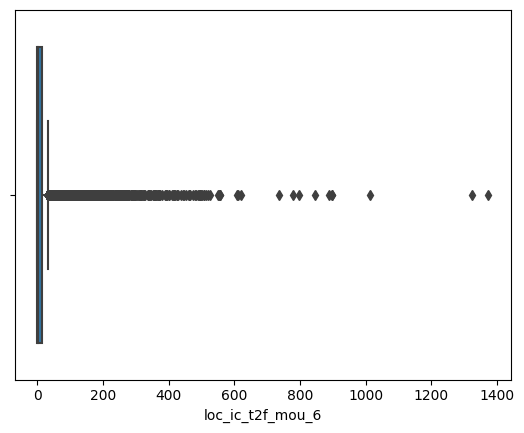

<Axes: xlabel='loc_ic_t2f_mou_7'>

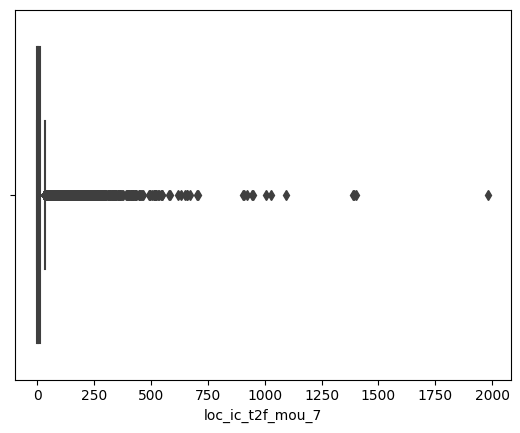

<Axes: xlabel='loc_ic_t2f_mou_8'>

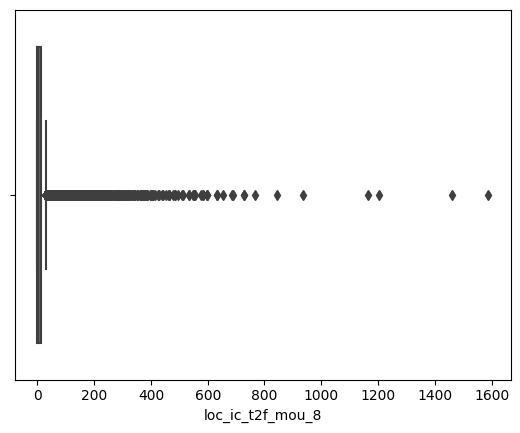

<Axes: xlabel='loc_ic_mou_6'>

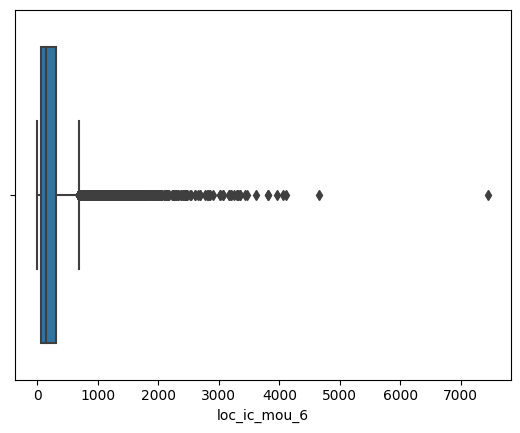

<Axes: xlabel='loc_ic_mou_7'>

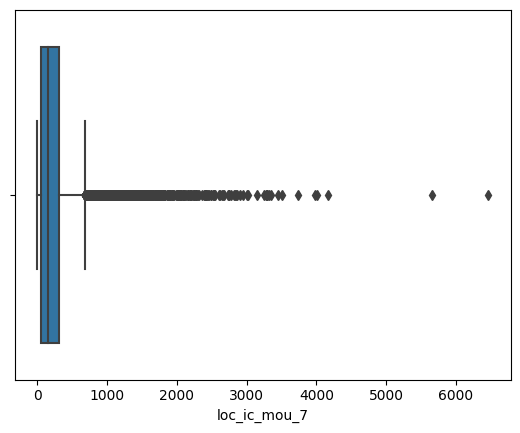

<Axes: xlabel='loc_ic_mou_8'>

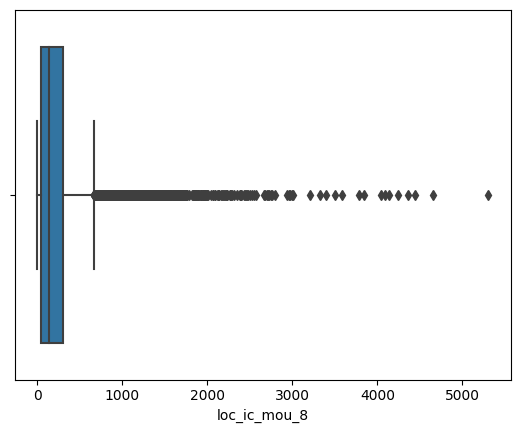

<Axes: xlabel='std_ic_t2t_mou_6'>

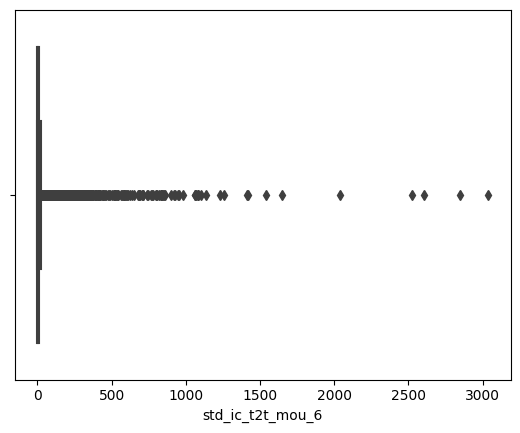

<Axes: xlabel='std_ic_t2t_mou_7'>

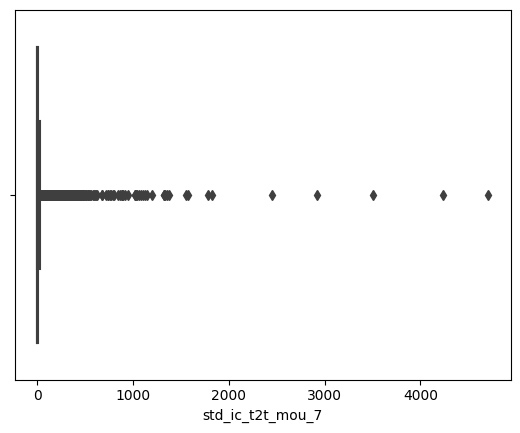

<Axes: xlabel='std_ic_t2t_mou_8'>

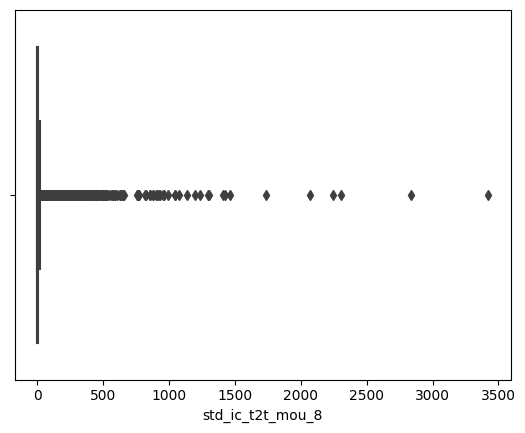

<Axes: xlabel='std_ic_t2m_mou_6'>

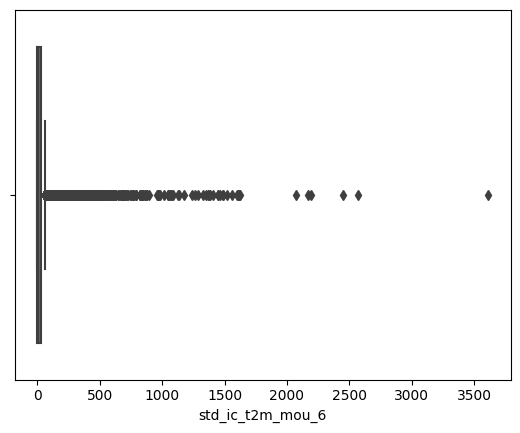

<Axes: xlabel='std_ic_t2m_mou_7'>

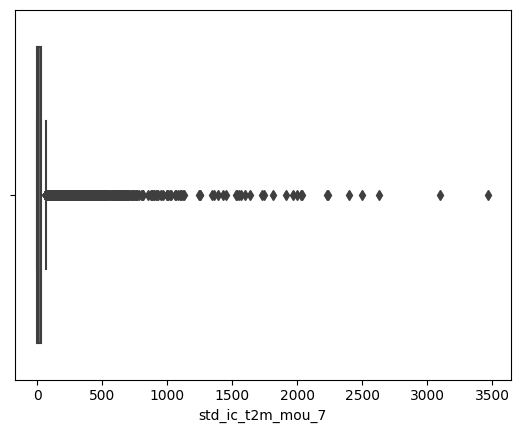

<Axes: xlabel='std_ic_t2m_mou_8'>

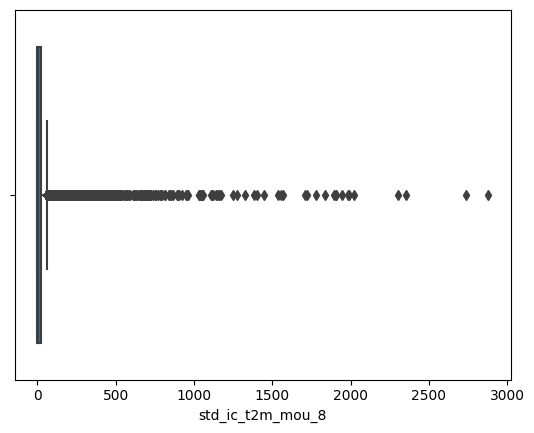

<Axes: xlabel='std_ic_t2f_mou_6'>

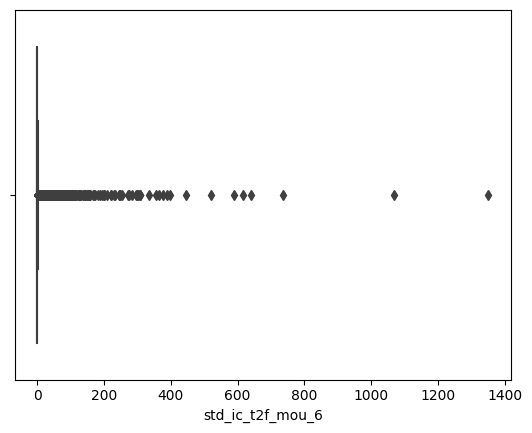

<Axes: xlabel='std_ic_t2f_mou_7'>

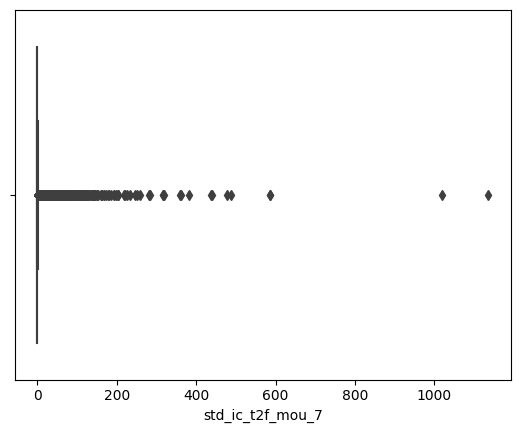

<Axes: xlabel='std_ic_t2f_mou_8'>

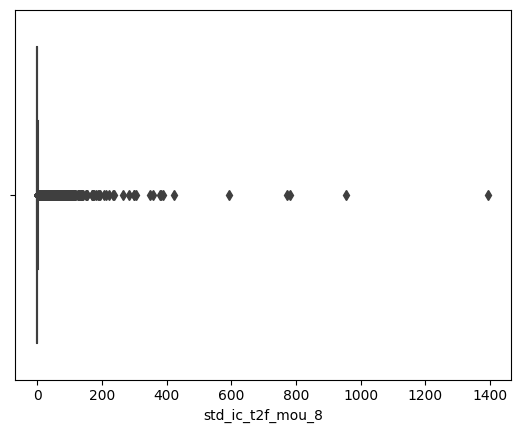

<Axes: xlabel='std_ic_mou_6'>

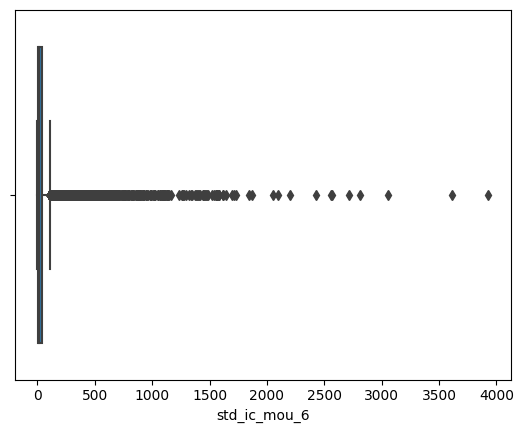

<Axes: xlabel='std_ic_mou_7'>

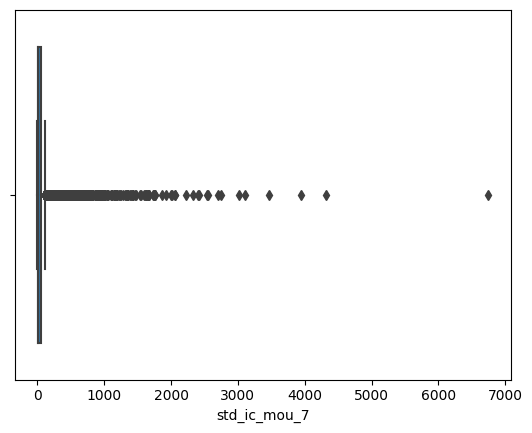

<Axes: xlabel='std_ic_mou_8'>

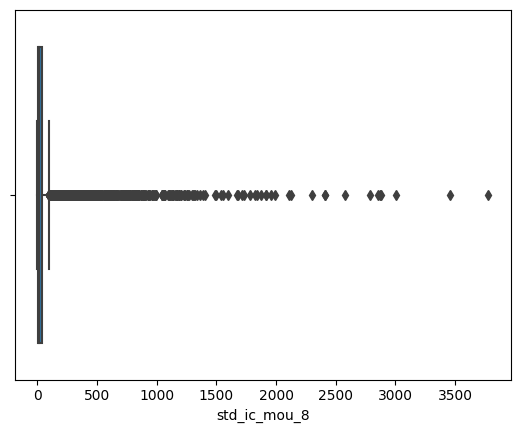

<Axes: xlabel='total_ic_mou_6'>

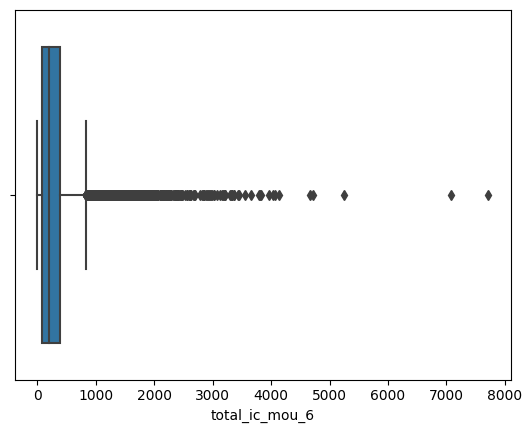

<Axes: xlabel='total_ic_mou_7'>

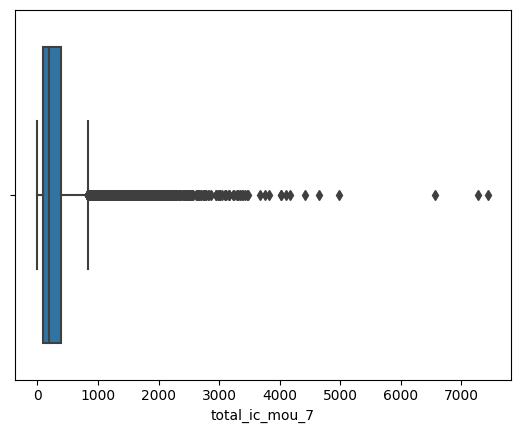

<Axes: xlabel='total_ic_mou_8'>

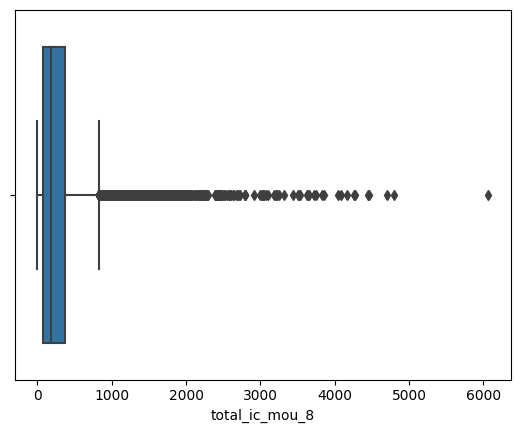

<Axes: xlabel='spl_ic_mou_6'>

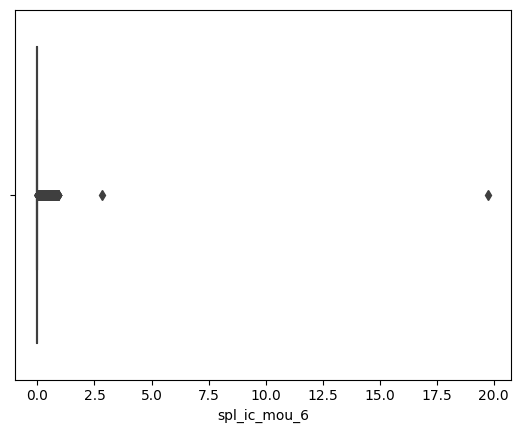

<Axes: xlabel='spl_ic_mou_7'>

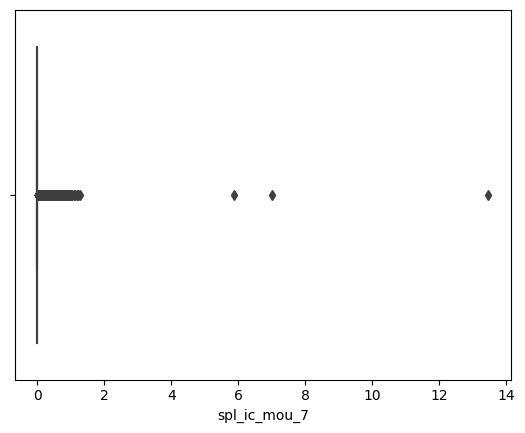

<Axes: xlabel='spl_ic_mou_8'>

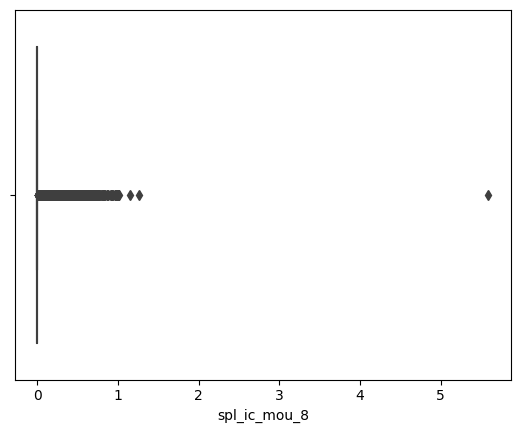

<Axes: xlabel='isd_ic_mou_6'>

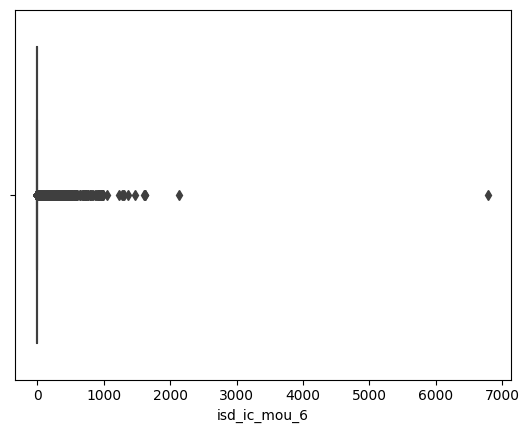

<Axes: xlabel='isd_ic_mou_7'>

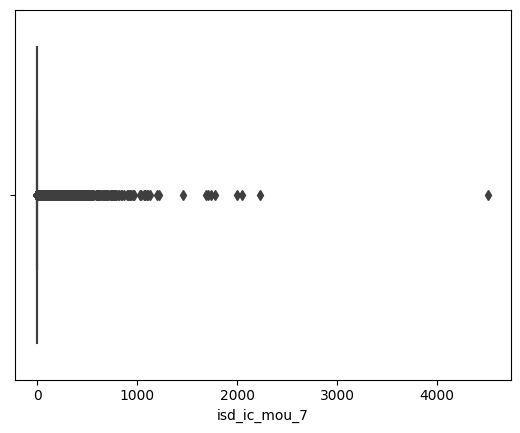

<Axes: xlabel='isd_ic_mou_8'>

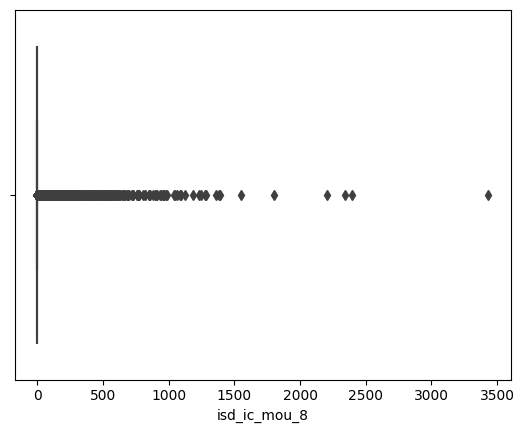

<Axes: xlabel='ic_others_mou_6'>

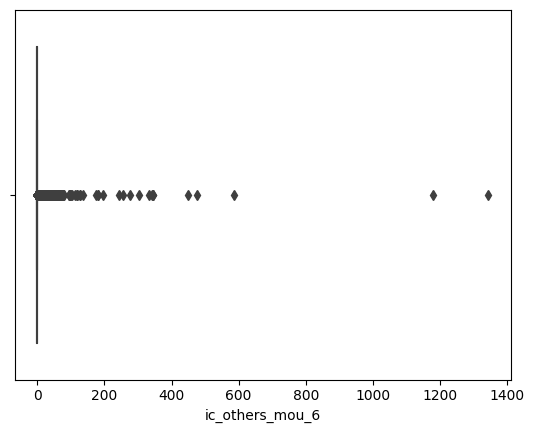

<Axes: xlabel='ic_others_mou_7'>

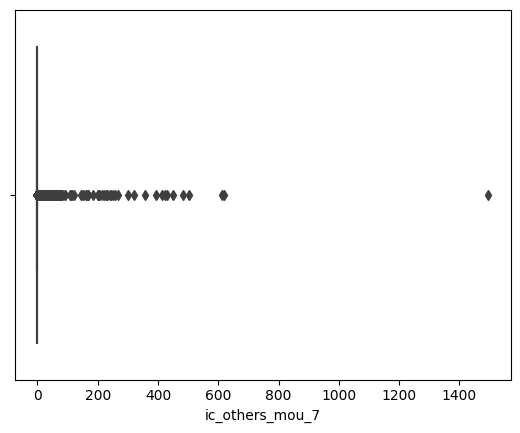

<Axes: xlabel='ic_others_mou_8'>

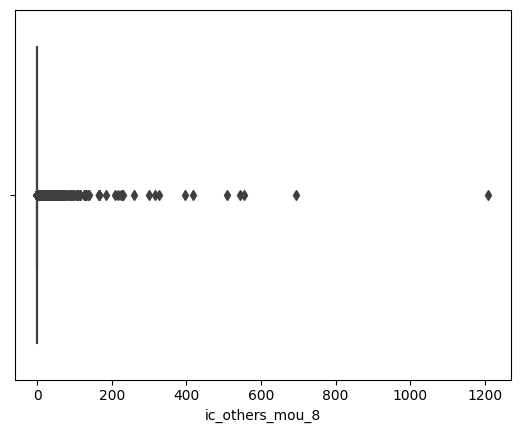

<Axes: xlabel='total_rech_num_6'>

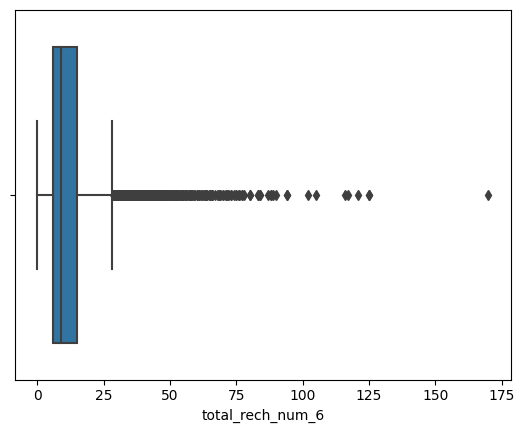

<Axes: xlabel='total_rech_num_7'>

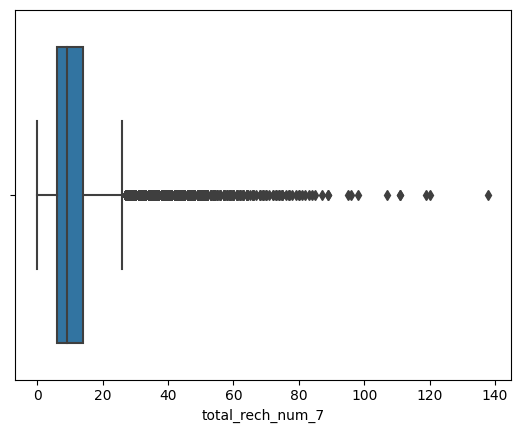

<Axes: xlabel='total_rech_num_8'>

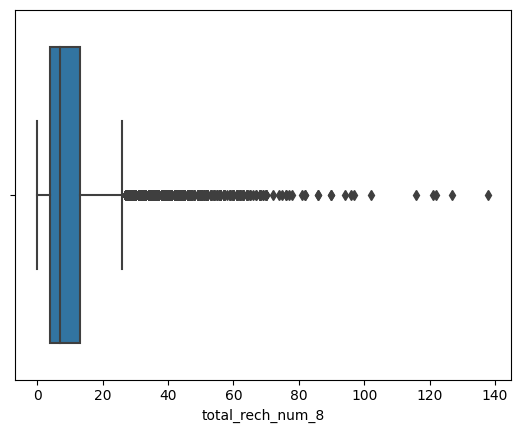

<Axes: xlabel='total_rech_amt_6'>

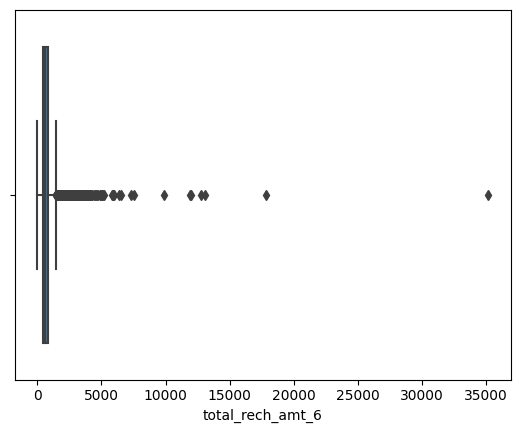

<Axes: xlabel='total_rech_amt_7'>

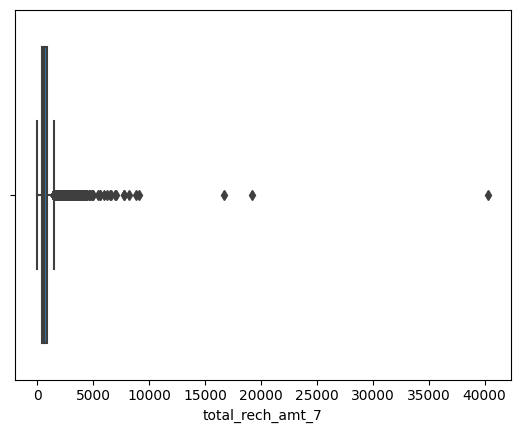

<Axes: xlabel='total_rech_amt_8'>

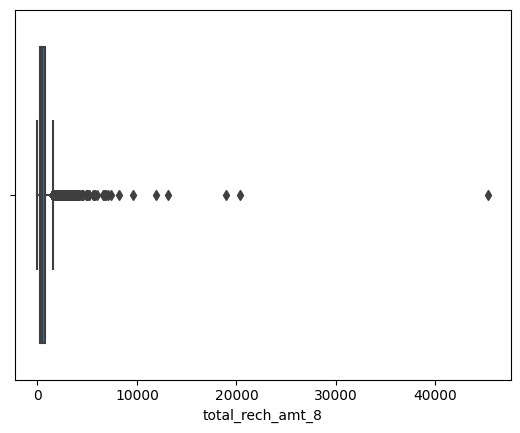

<Axes: xlabel='max_rech_amt_6'>

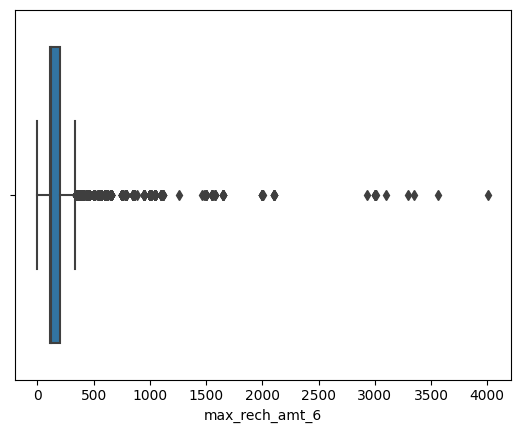

<Axes: xlabel='max_rech_amt_7'>

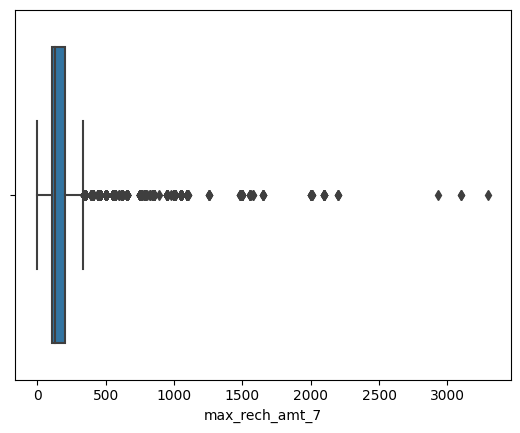

<Axes: xlabel='max_rech_amt_8'>

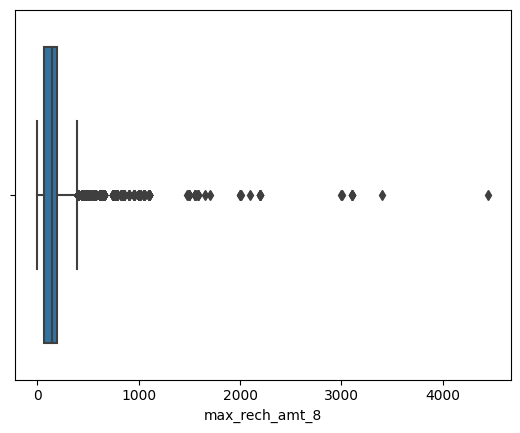

<Axes: xlabel='last_day_rch_amt_6'>

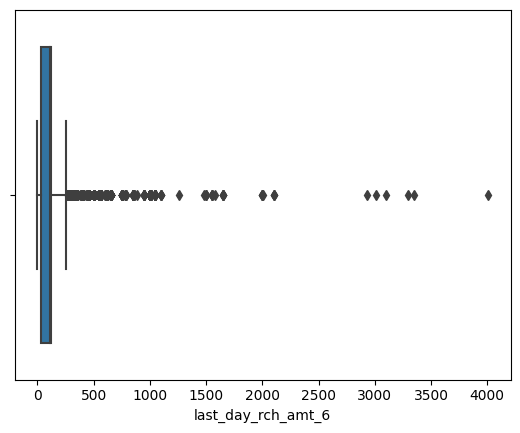

<Axes: xlabel='last_day_rch_amt_7'>

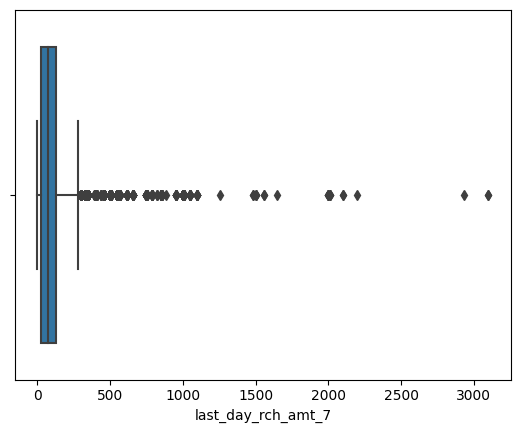

<Axes: xlabel='last_day_rch_amt_8'>

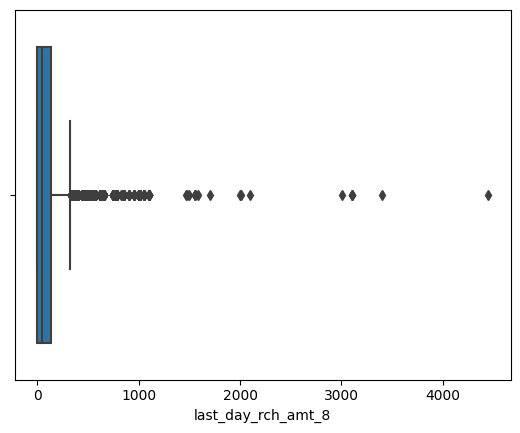

<Axes: xlabel='av_rech_amt_data_6'>

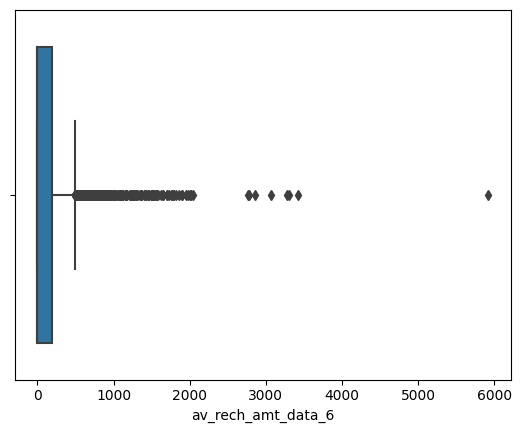

<Axes: xlabel='av_rech_amt_data_7'>

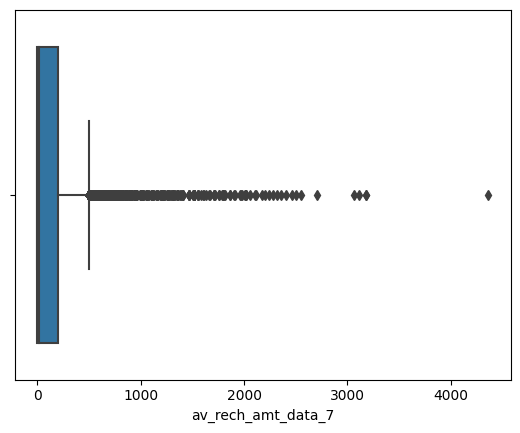

<Axes: xlabel='av_rech_amt_data_8'>

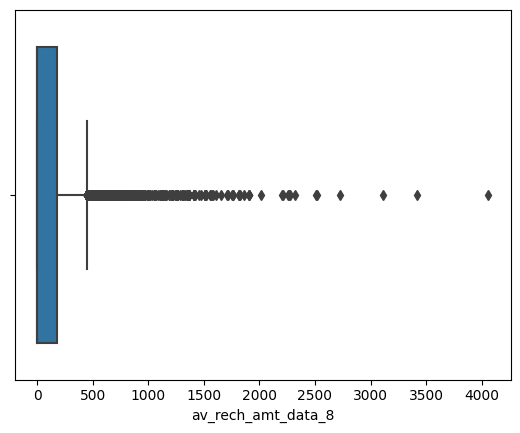

<Axes: xlabel='vol_2g_mb_6'>

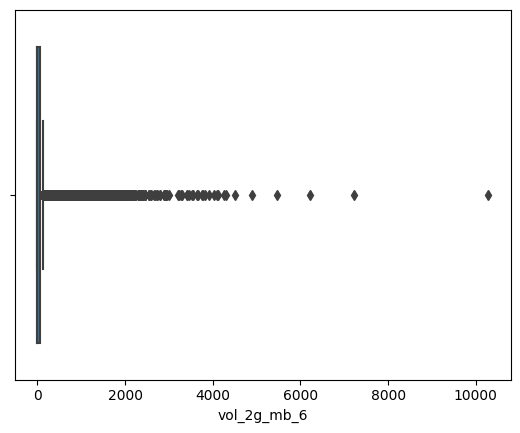

<Axes: xlabel='vol_2g_mb_7'>

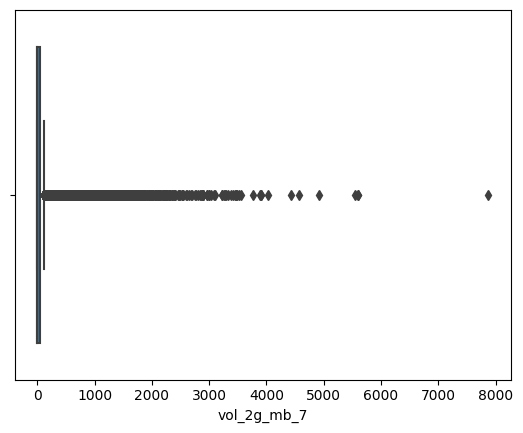

<Axes: xlabel='vol_2g_mb_8'>

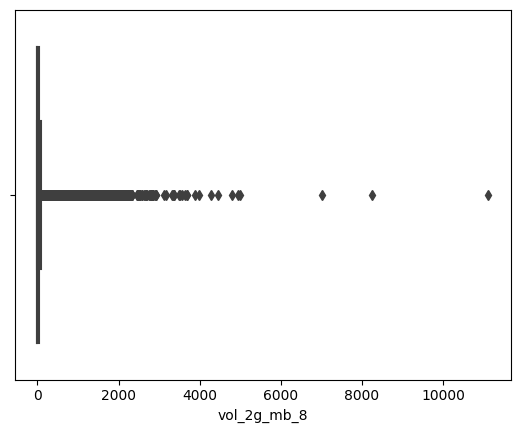

<Axes: xlabel='vol_3g_mb_6'>

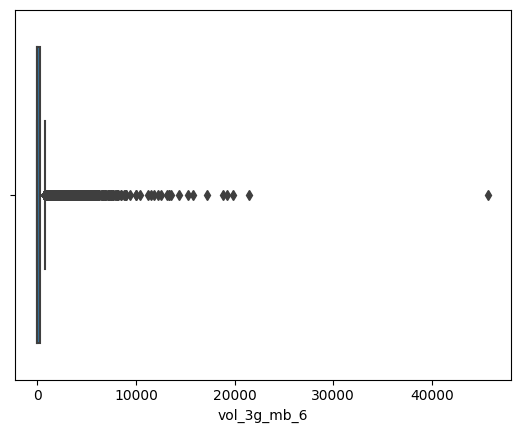

<Axes: xlabel='vol_3g_mb_7'>

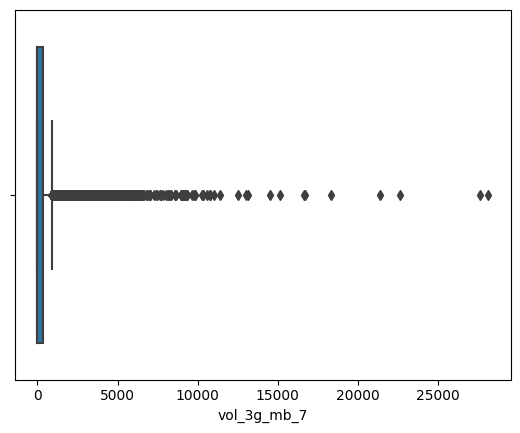

<Axes: xlabel='vol_3g_mb_8'>

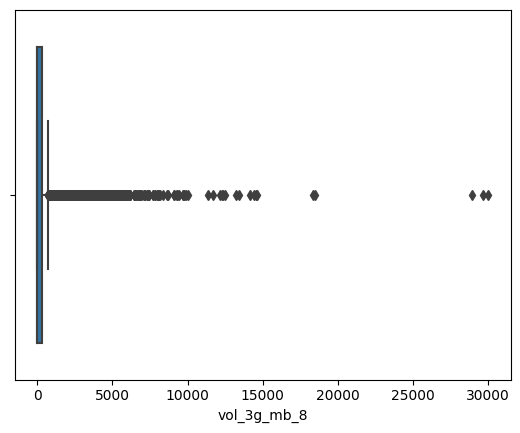

<Axes: xlabel='monthly_2g_6'>

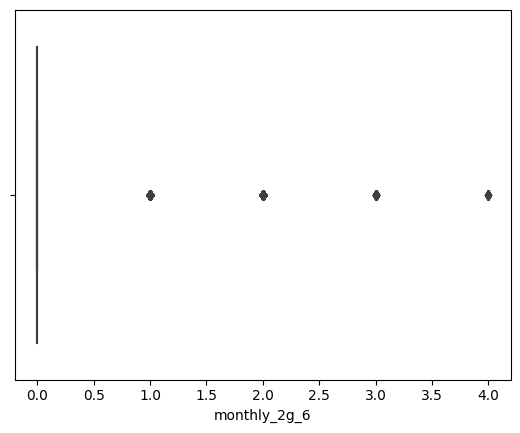

<Axes: xlabel='monthly_2g_7'>

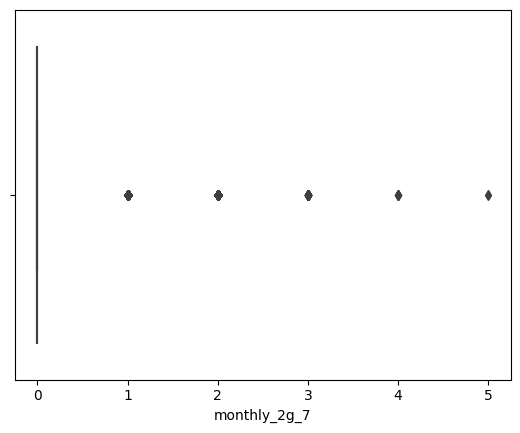

<Axes: xlabel='monthly_2g_8'>

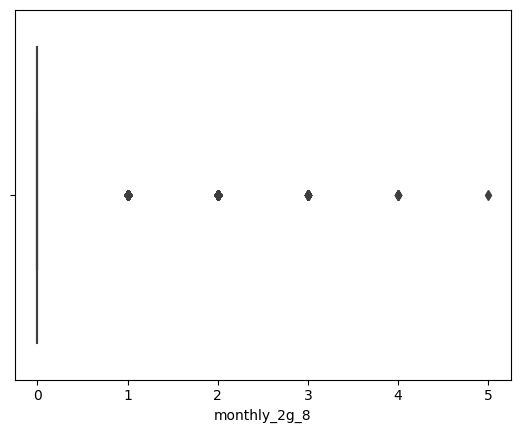

<Axes: xlabel='sachet_2g_6'>

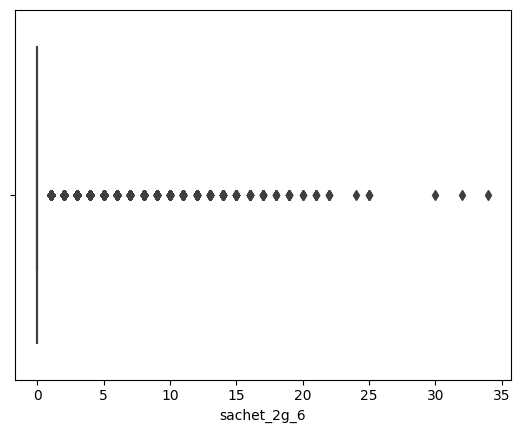

<Axes: xlabel='sachet_2g_7'>

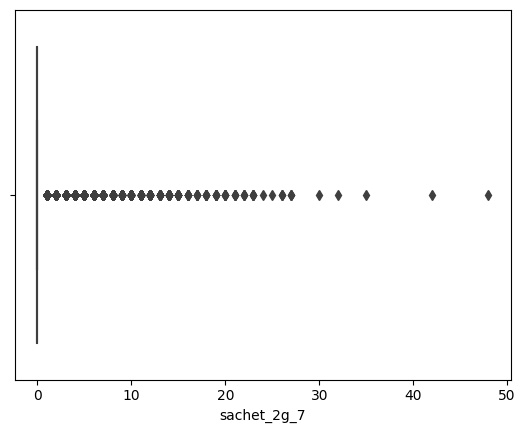

<Axes: xlabel='sachet_2g_8'>

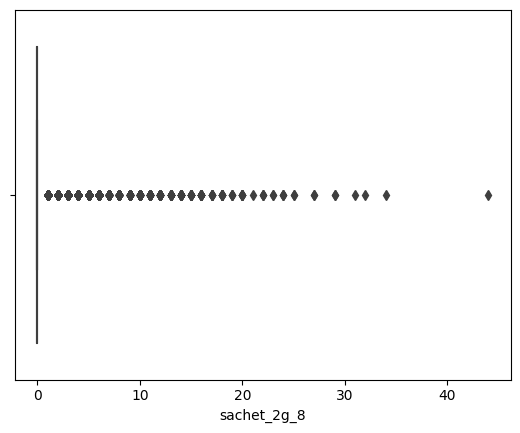

<Axes: xlabel='monthly_3g_6'>

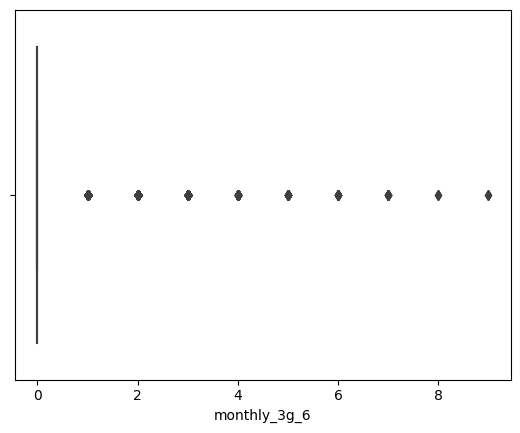

<Axes: xlabel='monthly_3g_7'>

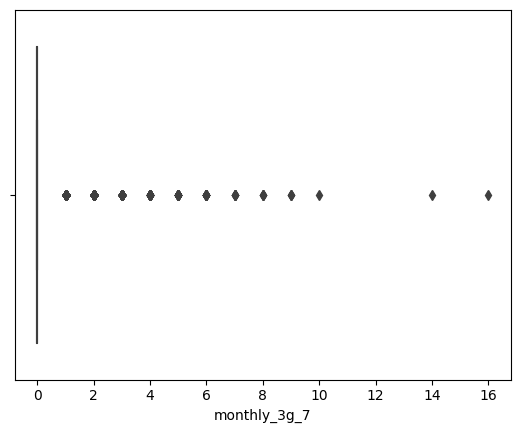

<Axes: xlabel='monthly_3g_8'>

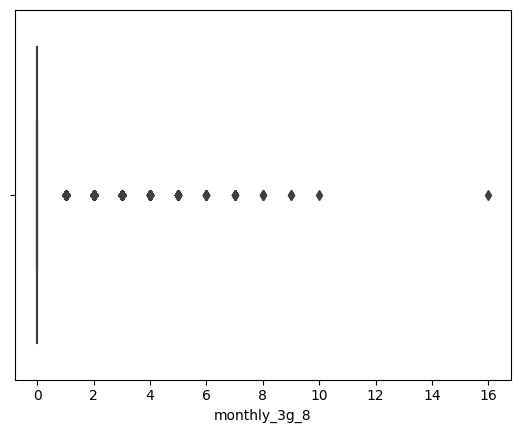

<Axes: xlabel='sachet_3g_6'>

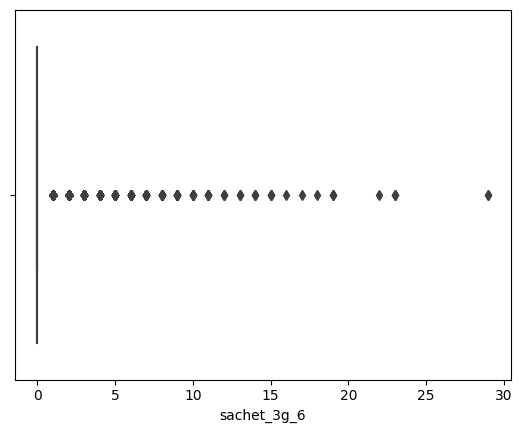

<Axes: xlabel='sachet_3g_7'>

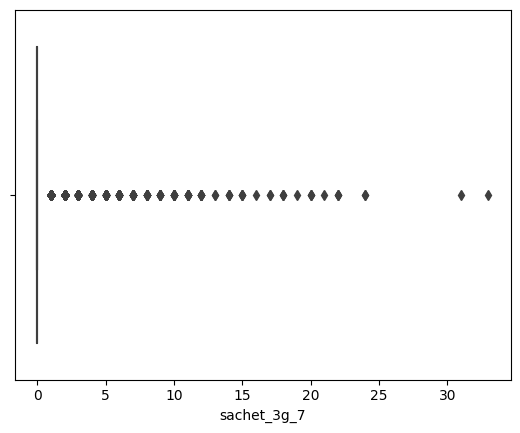

<Axes: xlabel='sachet_3g_8'>

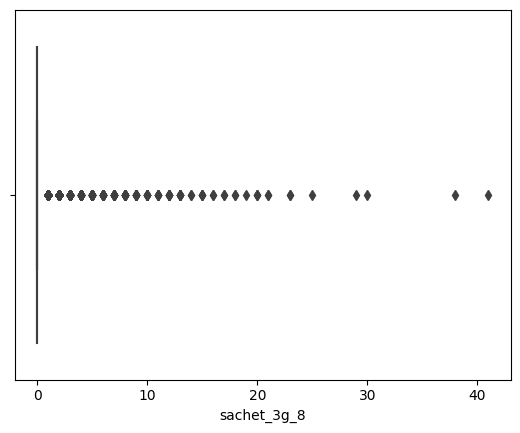

<Axes: xlabel='aon'>

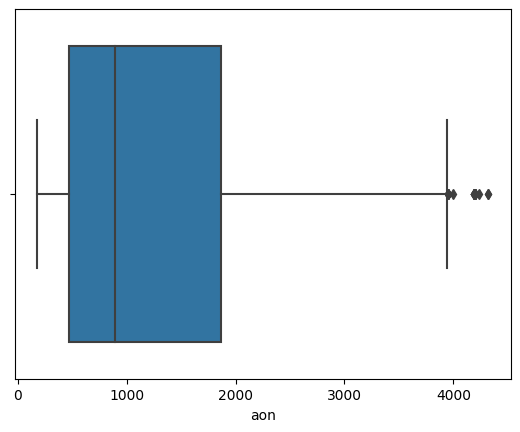

<Axes: xlabel='vbc_3g_8'>

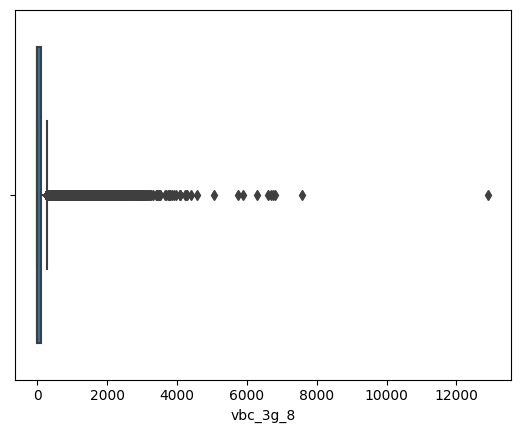

<Axes: xlabel='vbc_3g_7'>

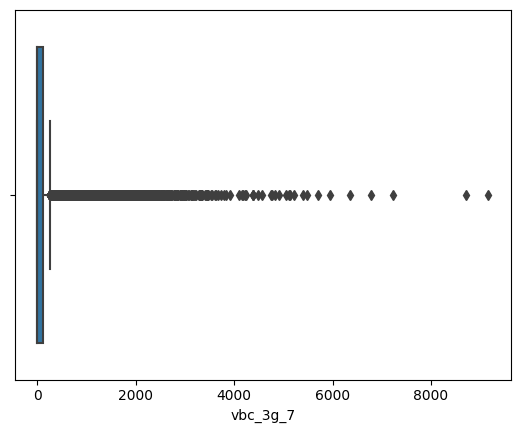

<Axes: xlabel='vbc_3g_6'>

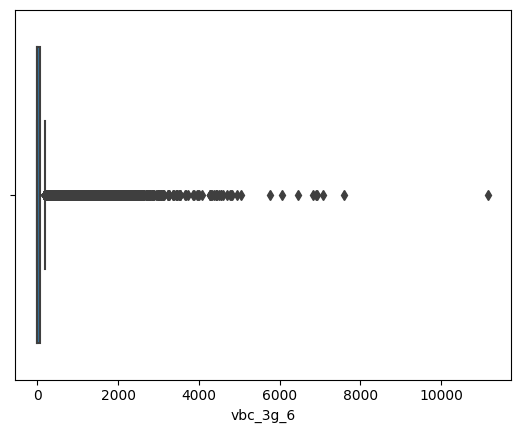

<Axes: xlabel='churn_probability'>

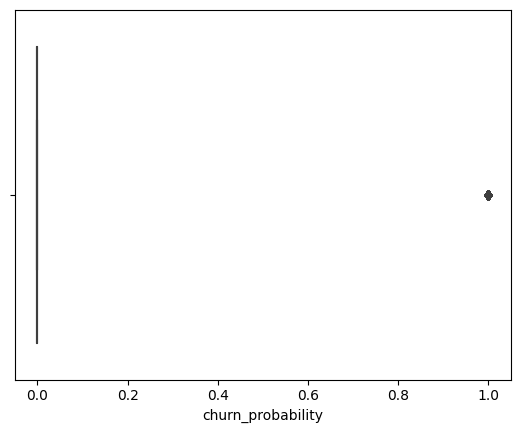

In [38]:
for col in churn_train_hvc:
    sns.boxplot(x=col,data=churn_train_hvc)
    plt.show()

**There are clearly a lot of outliers. However, since we are dealing with hvc customers, the outlier values might be legitimate values.Lets not remove outliers.**

In [39]:
# From above plots, it looks like few features are categorical variables in integer format
col = ['monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8']
for c in col:
    print(churn_train_hvc[c].value_counts())

0    17737
1     2880
2      352
3       20
4        6
Name: monthly_2g_6, dtype: int64
0    17576
1     2964
2      425
3       26
4        3
5        1
Name: monthly_2g_7, dtype: int64
0    18065
1     2640
2      263
3       21
4        5
5        1
Name: monthly_2g_8, dtype: int64
0    17729
1     2428
2      574
3      167
4       59
5       16
6       10
7        8
8        2
9        2
Name: monthly_3g_6, dtype: int64
0     17736
1      2298
2       689
3       163
4        48
5        27
6        18
7         6
8         4
9         3
16        1
14        1
10        1
Name: monthly_3g_7, dtype: int64
0     17955
1      2167
2       605
3       164
4        62
5        23
6         7
7         5
8         3
9         2
16        1
10        1
Name: monthly_3g_8, dtype: int64


In [40]:
# Get column location and save it. This will be used in SMOTENC to remove class imabalance
cat_col_index = []

for c in col:
    cat_col_index.append(churn_train_hvc.columns.get_loc(c))

# Analysing column co-relation

**It does not make any sense to create a heatmap over the entire dataframe as number of columns are large. Therefore lets corelated few variables at a time based on type of columns**

In [41]:
# Helper function to create heatmaps
def heat_plot(df, col):
    col = col.to_list()
    # add churn_probability also to check co-relation
    col += ['churn_probability']
    mask = np.array(df[col].corr())
    mask[np.tril_indices_from(mask)] = False
    heat = df[col].corr()
    plt.figure(figsize=(20, 20))
    sns.heatmap(heat, mask=mask, cmap="YlGnBu", annot=True)
    plt.show()

## Lets co-relate incoming and outgoing MOU for month 6, month 7 and month 8 separately

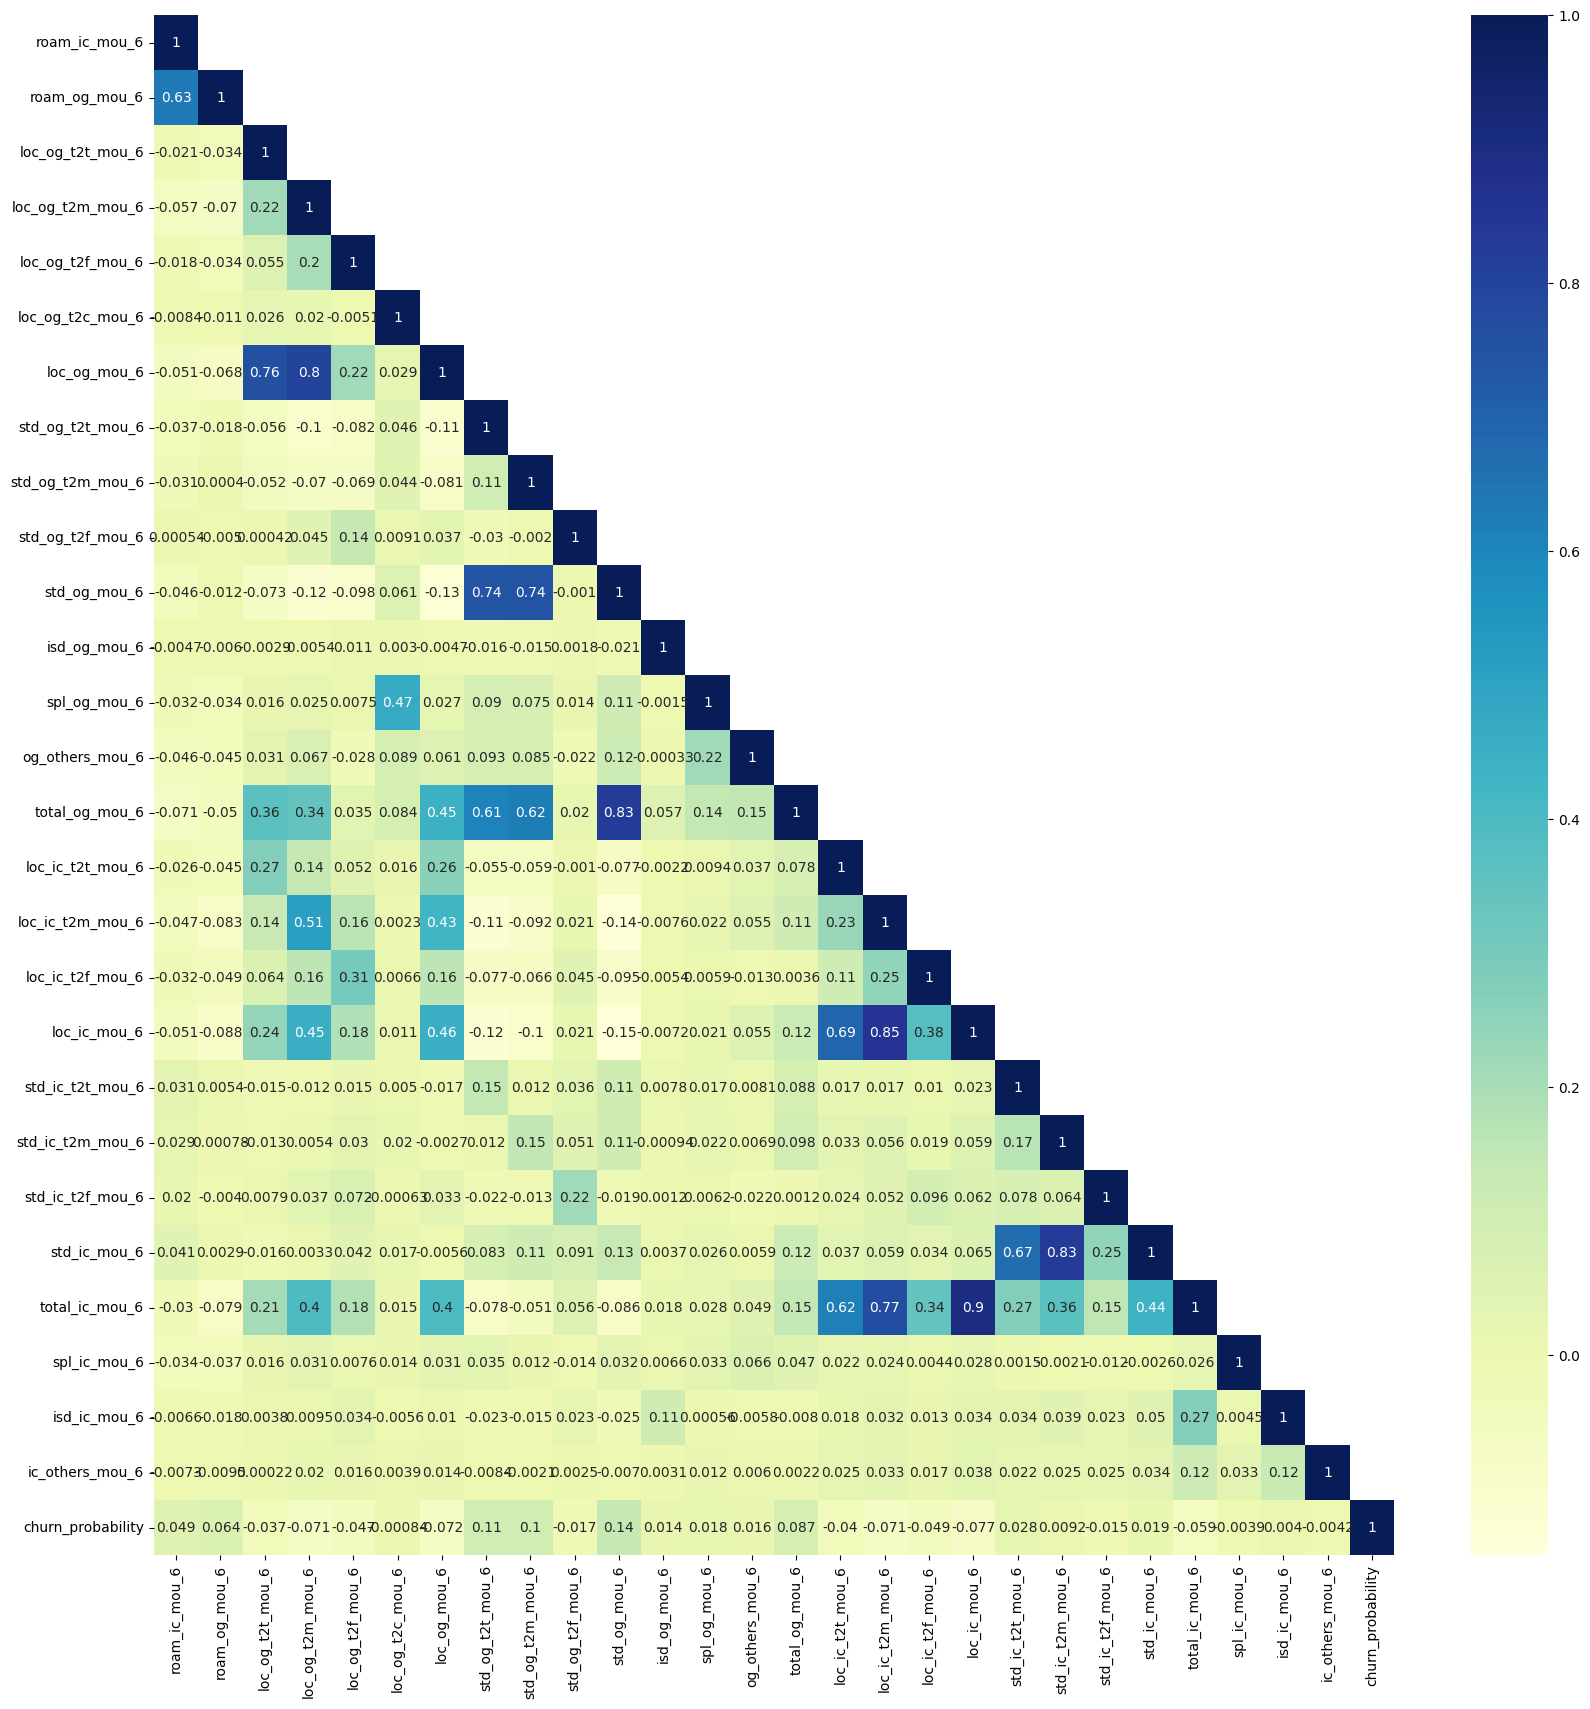

In [42]:
# incoming and outgoing mou in month 6
cols= churn_train_hvc.columns[churn_train_hvc.columns.str.contains('.*ic_.*mou_6|.*og_.*mou_6', regex=True)]
heat_plot(churn_train_hvc, cols)

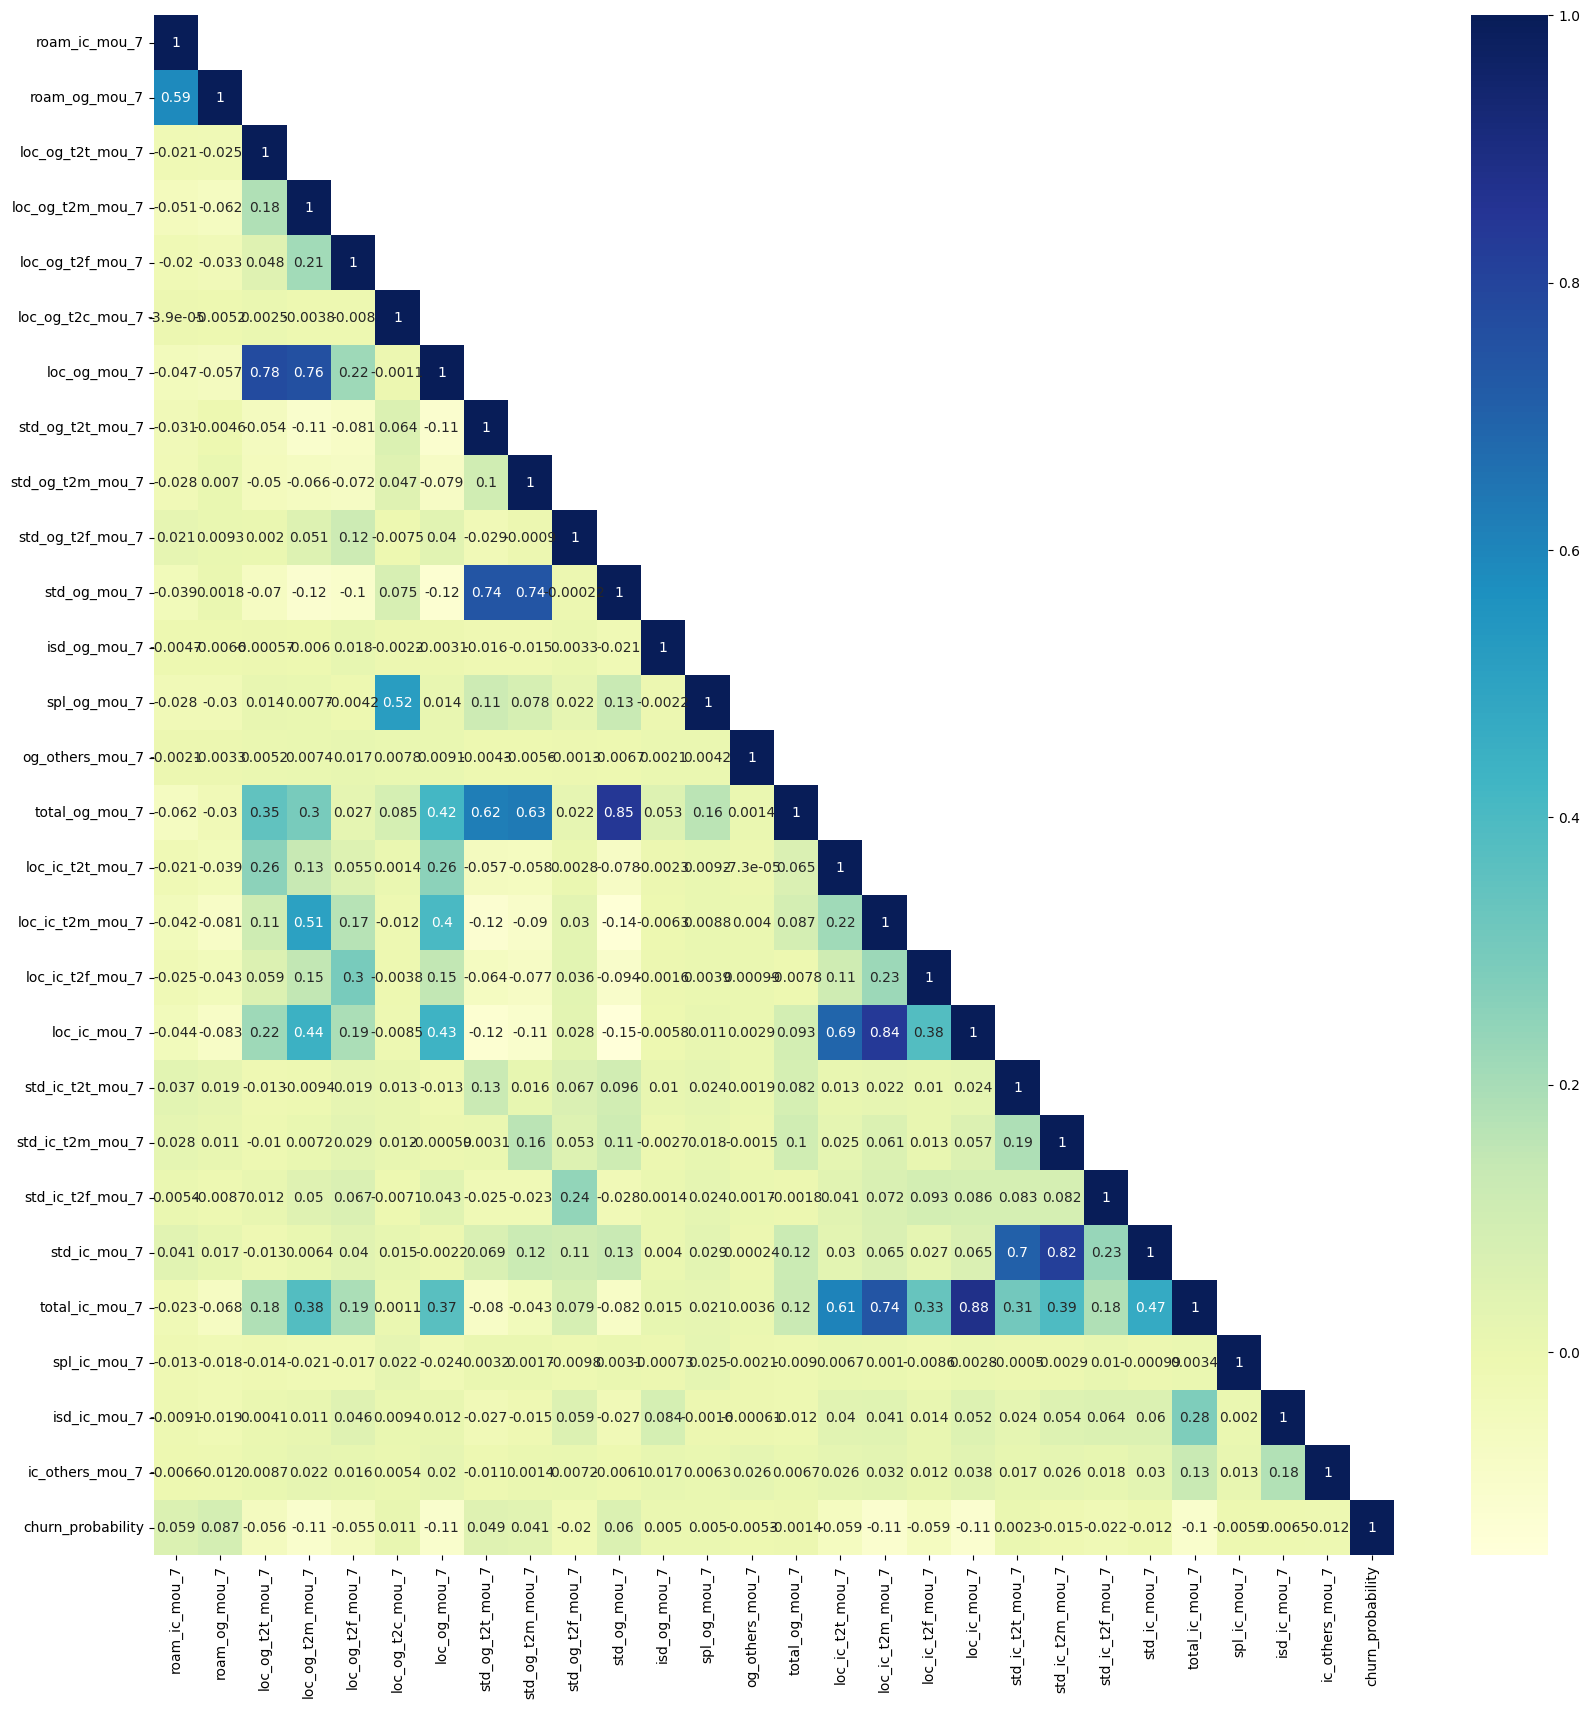

In [43]:
# incoming and outgoing mou in month 7
cols= churn_train_hvc.columns[churn_train_hvc.columns.str.contains('.*ic_.*mou_7|.*og_.*mou_7', regex=True)]
heat_plot(churn_train_hvc, cols)

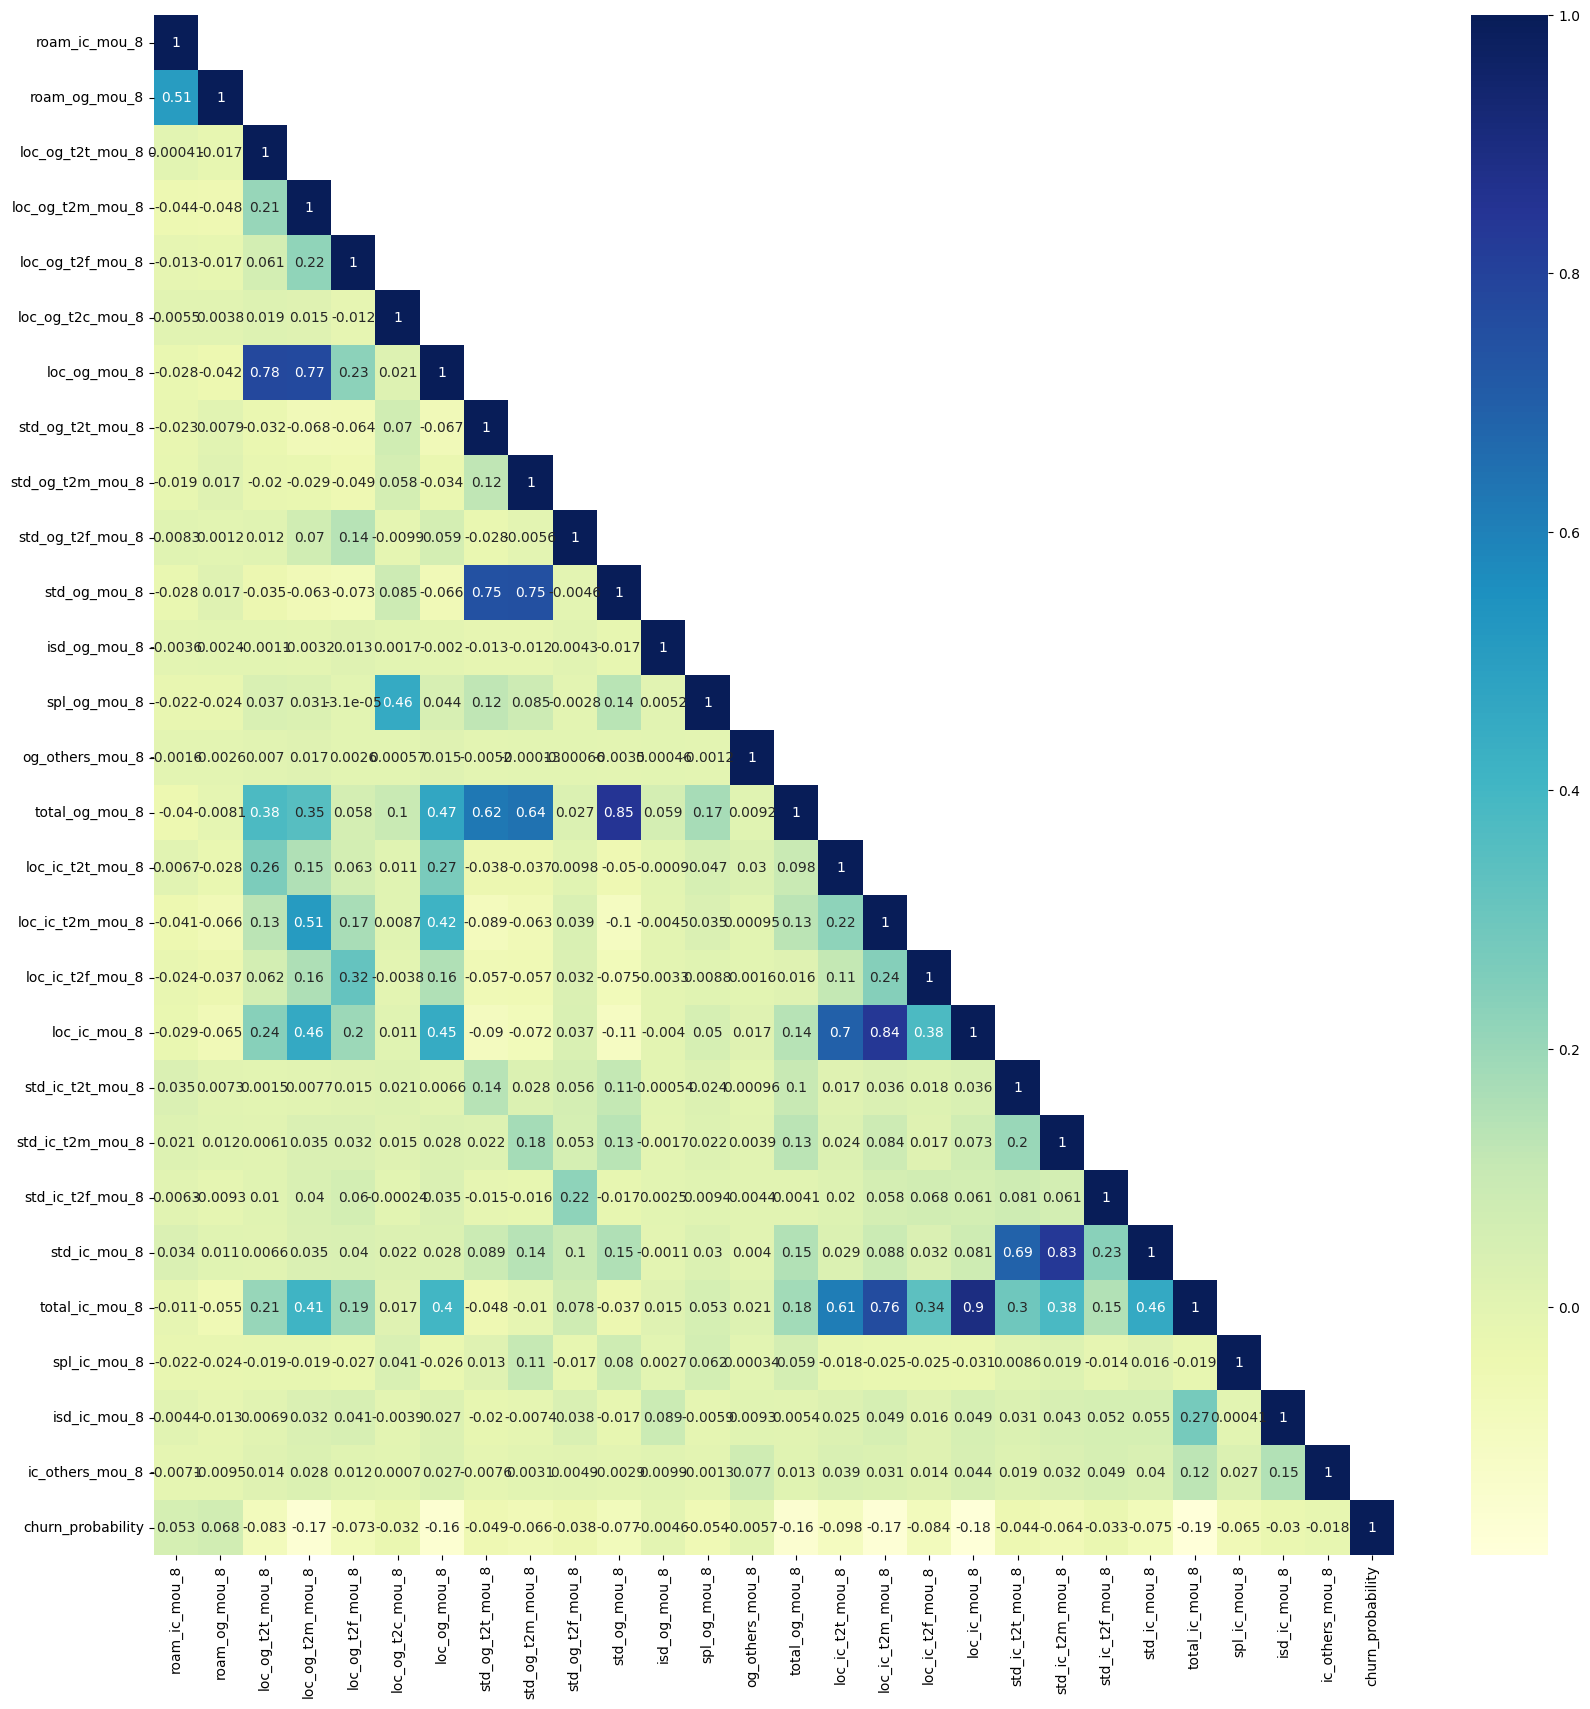

In [44]:
# incoming and outgoing mou in month 8
cols= churn_train_hvc.columns[churn_train_hvc.columns.str.contains('.*ic_.*mou_8|.*og_.*mou_8', regex=True)]
heat_plot(churn_train_hvc, cols)

**Observations:**
- loc_og_mou_6, loc_og_t2t_mou_6, loc_og_t2m_mou_6 and loc_og_t2f_mou_6 seem to be highly co-related and therefore redundant.
- loc_og_mou_7, loc_og_t2t_mou_7, loc_og_t2m_mou_7 and loc_og_t2f_mou_7 seem to be highly co-related and therefore redundant.
- loc_og_mou_8, loc_og_t2t_mou_8, loc_og_t2m_mou_8 and loc_og_t2f_mou_8 seem to be highly co-related  and therefore redundant.
- std_ic_mou_6, std_ic_t2t_mou_6, std_ic_t2m_mou_6 and std_ic_t2f_mou_6 seem to be highly co-related and therefore redundant.
- std_ic_mou_7, std_ic_t2t_mou_7, std_ic_t2m_mou_7 and std_ic_t2f_mou_7 seem to be highly co-related and therefore redundant.
- std_ic_mou_8, std_ic_t2t_mou_8, std_ic_t2m_mou_8 and std_ic_t2f_mou_8 seem to be highly co-related and therefore redundant.
- total_ic_mou_6, loc_ic_mou_6, std_ic_mou_6, isd_ic_mou_6, spl_ic_mou_6 and ic_others_mou_6 seem to be highly co-related and therefore redundant.
- total_ic_mou_7, loc_ic_mou_7, std_ic_mou_7, isd_ic_mou_7, spl_ic_mou_7 and ic_others_mou_7 seem to be highly co-related and therefore redundant.
- total_ic_mou_8, loc_ic_mou_8, std_ic_mou_8, isd_ic_mou_8, spl_ic_mou_8 and ic_others_mou_8 seem to be highly co-related and therefore redundant.
- There is no need to drop these columns manually. Using PCA we can get more compressed feature space. However using PCA will cause the model to loose its interpretability. Since we are also looking to extracting important features which drive churn, we need to create another model without PCA.

## Bivariate/Multivariate analysis

In [45]:
# Lets create helper functions first for visualization

def multi_bar_plot(df, col):
    hlen = len(col)
    data = pd.DataFrame()
    data['No Churn'] = churn_train_hvc[churn_train_hvc['churn_probability'] == 0][col].mean()
    data['Churn'] = churn_train_hvc[churn_train_hvc['churn_probability'] == 1][col].mean()
    data.plot.bar(rot=0, figsize=(hlen * 2,5))
    plt.show()

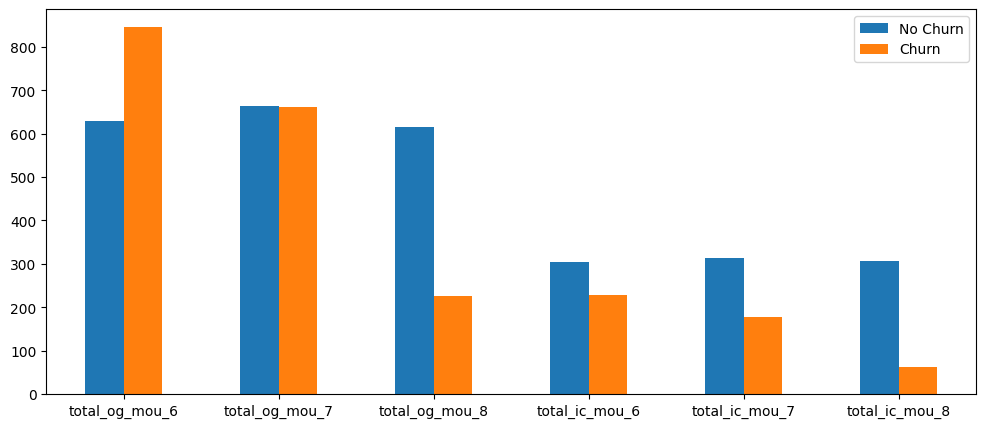

In [46]:
# Lets see how churn varies for total outgoing and incoming calls across 3 months

col = ['total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8',
                   'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8']
multi_bar_plot(churn_train_hvc, col)

**Observations:**
- Churning customers seems to be using outgoing less and less as time progress
- The change w.r.t incoming calls seem to be less significant indicator of churn.

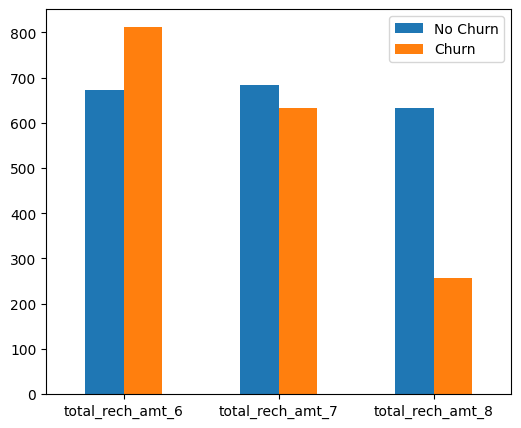

In [47]:
# Lets see how churn varies for total recharge amount across 3 months

col = ['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8' ]
multi_bar_plot(churn_train_hvc, col)

**Observations:**
- Recharge amount seem to be decreasing for churning customers

<Axes: xlabel='churn_probability', ylabel='arpu_6'>

<Axes: xlabel='churn_probability', ylabel='arpu_7'>

<Axes: xlabel='churn_probability', ylabel='arpu_8'>

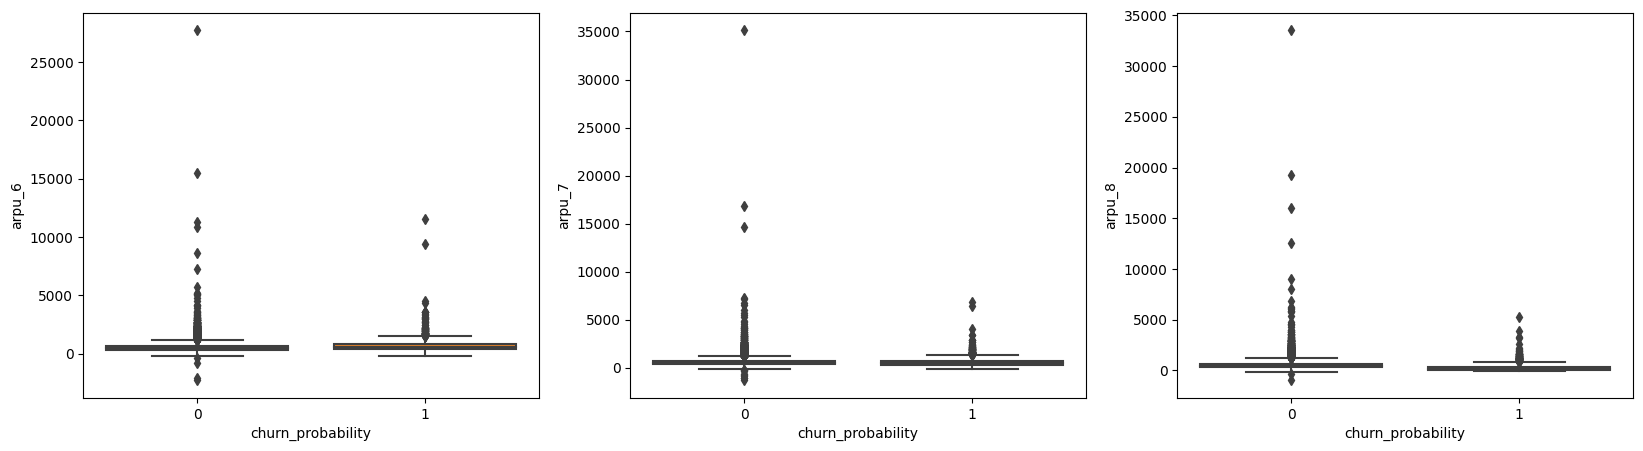

In [48]:
# Lets see how churn varies with arpu

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
sns.boxplot(y='arpu_6',x='churn_probability', data=churn_train_hvc, ax = axes[0])
sns.boxplot(y='arpu_7',x='churn_probability', data=churn_train_hvc, ax = axes[1])
sns.boxplot(y='arpu_8',x='churn_probability', data=churn_train_hvc, ax = axes[2])
plt.show()

**Observations:**
- There is significant outliers in non churn case
- Spread seems to be less for month 8

## Derive new features

In [49]:
# Lets derive a new feature called loyalty which depends on how long a customer is a member
churn_train_hvc['loyalty'] = churn_train_hvc['aon'] / 30
churn_train_hvc['loyalty'].describe()

count    20995.000000
mean        41.465746
std         32.209202
min          6.000000
25%         15.700000
50%         29.633333
75%         62.116667
max        144.033333
Name: loyalty, dtype: float64

<Axes: xlabel='loyalty', ylabel='count'>

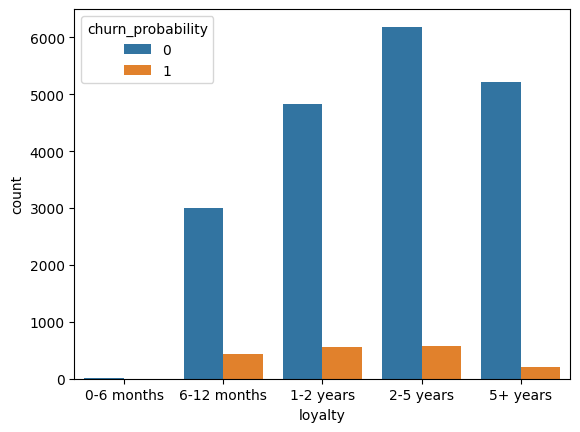

In [50]:
#Lets convert above to a categorical variable
churn_train_hvc['loyalty'] = pd.cut(churn_train_hvc['loyalty'],
                             [0, 6, 12, 24, 60, 156],
                             labels = ['0-6 months', '6-12 months', '1-2 years', '2-5 years', '5+ years'])

# Plot the new variable against churning probability.
sns.countplot(x='loyalty', hue='churn_probability', data=churn_train_hvc)
plt.show()

**Observations:**
- As expected long time customers seem to churn less

In [51]:
# Remove column after analysis
churn_train_hvc.drop(labels = 'loyalty', axis = 1, inplace = True)

In [52]:
churn_train_hvc.shape

(20995, 128)

## Train-Validation Split

In [53]:
from sklearn.model_selection import train_test_split

df_train,df_test=train_test_split(churn_train_hvc,train_size=0.8,random_state=100)

print("Train Data Shape",df_train.shape)
print("Test Data Shape",df_test.shape)

Train Data Shape (16796, 128)
Test Data Shape (4199, 128)


In [54]:
# Remove churn probability as its our target variable
y_train = df_train.pop('churn_probability')
X_train = df_train
y_test = df_test.pop('churn_probability')
X_test = df_test

In [55]:
#Fix class imbalance using SMOTENC

#Provide the categorical column list created earlier
smotenc = SMOTENC(cat_col_index, random_state = 42)

# Fit to the training set
X_train, y_train = smotenc.fit_resample(X_train, y_train)

X_train.shape

(30702, 127)

## Scaling Numerical Variables

In [56]:
# Scaling numerical varibales on the train data set
from sklearn.preprocessing import MinMaxScaler
col=X_train.columns
scaler=MinMaxScaler()
X_train[col]=scaler.fit_transform(X_train[col])
X_train[col].head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_mou_6,og_others_mou_7,og_others_mou_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_mou_6,ic_others_mou_7,ic_others_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6
0,0.089935,0.048431,0.028554,0.061896,0.034592,0.002943,0.071877,0.140445,0.004786,0.0,0.0,0.0,0.0,0.0,0.0,0.001650,0.000677,0.000000,0.012985,0.035134,0.005763,0.000000,0.000000,0.000000,0.055809,0.000000,0.000000,0.006728,0.021516,0.002590,0.060541,0.034078,0.003948,0.062604,0.118760,0.002756,0.0000,0.0,0.000000,0.114613,0.130424,0.005014,0.000000,0.0,0.0,0.019067,0.000000,0.000000,0.0,0.0,0.0,0.099087,0.148306,0.007028,0.001011,0.005764,0.000000,0.009421,0.016814,0.001574,0.000438,0.000000,0.000000,0.006295,0.015615,0.001378,0.001442,0.000539,0.000000,0.001212,0.004881,0.000278,0.000000,0.0,0.000000,0.002229,0.002889,0.000212,0.007256,0.014492,0.001378,0.000000,0.0,0.044723,0.000000,0.0,0.0,0.000223,0.00000,0.0,0.047059,0.050725,0.036232,0.015374,0.014032,0.000000,0.029925,0.036375,0.00000,0.029925,0.038710,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0000,0.0,0.0,0.0,0.000000,0.330838,0.0,0.0,0.0
1,0.087111,0.044468,0.035030,0.011337,0.003581,0.001577,0.052913,0.038973,0.014021,0.0,0.0,0.0,0.0,0.0,0.0,0.007655,0.003947,0.001577,0.092746,0.052989,0.031369,0.011108,0.019354,0.041272,0.000000,0.011793,0.000000,0.046199,0.037327,0.017833,0.004668,0.000000,0.000000,0.000000,0.000000,0.000484,0.0000,0.0,0.023182,0.004078,0.000000,0.001070,0.000000,0.0,0.0,0.000000,0.004274,0.001582,0.0,0.0,0.0,0.049289,0.035228,0.015193,0.027386,0.013054,0.010432,0.092937,0.077335,0.019313,0.027369,0.012698,0.008738,0.076381,0.067747,0.027394,0.001511,0.000346,0.000000,0.000000,0.000176,0.000316,0.024595,0.0,0.000115,0.009628,0.000332,0.000286,0.078696,0.053560,0.024134,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.00871,0.0,0.035294,0.065217,0.043478,0.011793,0.011454,0.004634,0.031920,0.036375,0.02922,0.009227,0.000000,0.029220,0.0,0.02291,0.000000,0.0,0.012676,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.083333,0.0,0.0,0.0000,0.0,0.0,0.0,0.000000,0.665781,0.0,0.0,0.0
2,0.110588,0.035397,0.027423,0.030080,0.000000,0.000000,0.112221,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.001755,0.000000,0.000000,0.017084,0.000000,0.000000,0.038149,0.000000,0.000000,

In [57]:
# Scaling numerical variables on the test data set

X_test[col]=scaler.transform(X_test[col])
X_test[col].head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_mou_6,og_others_mou_7,og_others_mou_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_mou_6,ic_others_mou_7,ic_others_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6
52306,0.096797,0.046524,0.042077,0.066939,0.026244,0.036738,0.091060,0.085908,0.038638,0.0,0.0,0.000000,0.0,0.0,0.000000,0.012476,0.010264,0.008969,0.049642,0.052638,0.050547,0.000777,0.000748,0.000510,0.000000,0.000000,0.0,0.029492,0.041234,0.031479,0.056137,0.016983,0.037255,0.063481,0.051118,0.020798,0.0,0.0,0.0,0.111631,0.058446,0.042111,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.117601,0.095723,0.066669,0.003446,0.002033,0.010144,0.059622,0.086351,0.054224,0.000665,0.000116,0.001133,0.037734,0.062781,0.055458,0.044557,0.028046,0.027382,0.017388,0.050954,0.077789,0.002598,0.002711,0.00119,0.051343,0.046248,0.084541,0.126202,0.135879,0.178704,0.015182,0.00000,0.076923,0.217108,0.140608,0.116765,0.019373,0.020883,0.057221,0.076471,0.057971,0.108696,0.021313,0.011380,0.013989,0.017706,0.019703,0.017307,0.016209,0.020968,0.017307,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.648877,0.000000,0.000000,0.000000
51501,0.104857,0.053419,0.044820,0.042077,0.020258,0.018381,0.052537,0.028777,0.018448,0.0,0.0,0.000000,0.0,0.0,0.000000,0.048262,0.022168,0.018104,0.089026,0.035744,0.042853,0.001603,0.006917,0.000697,0.000145,0.007477,0.0,0.068544,0.043338,0.036929,0.000000,0.000148,0.000372,0.002160,0.002893,0.003253,0.0,0.0,0.0,0.002130,0.002496,0.003459,0.000000,0.000142,0.0,0.002160,0.004930,0.000000,0.0,0.0,0.0,0.070239,0.043450,0.032476,0.036934,0.040987,0.026818,0.020239,0.019968,0.017511,0.005613,0.020429,0.012987,0.034702,0.047306,0.039454,0.000000,0.000590,0.000126,0.000000,0.002761,0.002841,0.000222,0.000713,0.00266,0.000076,0.001954,0.003264,0.037980,0.044807,0.048777,0.011640,0.43685,0.000000,0.000631,0.000000,0.000000,0.024164,0.031238,0.061379,0.070588,0.050725,0.050725,0.028645,0.019041,0.017476,0.038404,0.060018,0.044504,0.031920,0.035484,0.025624,0.026014,0.080641,0.048756,0.074963,0.312391,0.270449,0.000000,0.000000,0.000000,0.25,0.4,0.2,0.000000,0.000000,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.431055,0.000000,0.000000,0.000000
50711,0.100932,0.054453,0.054887,0.161133,0.097473,0.093

## Model Building

In [58]:
#Helper function to print model metrics

def print_metrics(y, y_pred, confusion):   
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives

    Accuracy = accuracy_score(y, y_pred)
    Sensitivity = TP / float(TP+FN)
    Specificity = TN / float(TN+FP)
    
    print('Accuracy : ', Accuracy)
    print('Sensitivity : ', Sensitivity)
    print('Specificity : ', Specificity)

## Perform PCA

In [59]:
# Initiate PCA
pca = PCA(random_state=42)

# Fit train set on PCA
pca.fit(X_train)

# Principal components
pca.components_

PCA(random_state=42)

array([[-9.88317354e-03, -6.19229958e-03,  4.44532349e-03, ...,
         1.93322343e-02,  3.28475606e-02,  3.34880862e-02],
       [ 2.69079118e-02,  2.85677487e-02,  2.29643570e-02, ...,
        -1.89732295e-02, -3.94477514e-02, -5.01715188e-02],
       [-1.06327479e-02, -2.51877589e-02, -3.34350588e-02, ...,
        -3.42492103e-02, -4.67351312e-02, -4.26350478e-02],
       ...,
       [ 1.37806821e-06, -1.21567831e-06, -4.61988919e-07, ...,
         1.08880987e-07, -1.20019947e-07,  4.70234404e-08],
       [-1.16404741e-06, -1.54534919e-06,  1.67317427e-06, ...,
        -1.01392931e-07, -9.53518057e-08,  5.63680086e-08],
       [ 9.17894639e-07,  1.68288467e-06,  1.16459677e-06, ...,
         1.54394163e-07, -1.10530310e-09,  3.42360537e-08]])

In [60]:
# Explained variance ratio 
pca.explained_variance_ratio_

array([2.16776374e-01, 1.57673898e-01, 7.65032152e-02, 6.29191117e-02,
       5.15682560e-02, 4.34117678e-02, 4.17773733e-02, 3.33394666e-02,
       2.35608754e-02, 1.93703408e-02, 1.78656982e-02, 1.44795118e-02,
       1.33912680e-02, 1.29473322e-02, 1.27732101e-02, 1.16847777e-02,
       1.02163134e-02, 9.43765237e-03, 9.00631258e-03, 8.50036167e-03,
       7.47443873e-03, 7.35869420e-03, 6.83475268e-03, 6.80448174e-03,
       6.43259914e-03, 5.73127439e-03, 5.41597297e-03, 5.25819242e-03,
       5.00620426e-03, 4.55118042e-03, 4.52462867e-03, 4.15475770e-03,
       4.04678857e-03, 3.79973204e-03, 3.57485677e-03, 3.36810726e-03,
       3.29405152e-03, 3.23873400e-03, 3.06510364e-03, 2.88846334e-03,
       2.87476585e-03, 2.77347209e-03, 2.56772642e-03, 2.49155487e-03,
       2.38868100e-03, 2.08580393e-03, 1.99384982e-03, 1.88330108e-03,
       1.81917188e-03, 1.79224983e-03, 1.70433185e-03, 1.62075325e-03,
       1.48636346e-03, 1.36452081e-03, 1.30807034e-03, 1.22337424e-03,
      

Text(0, 0.5, 'Cumulative variance explained')

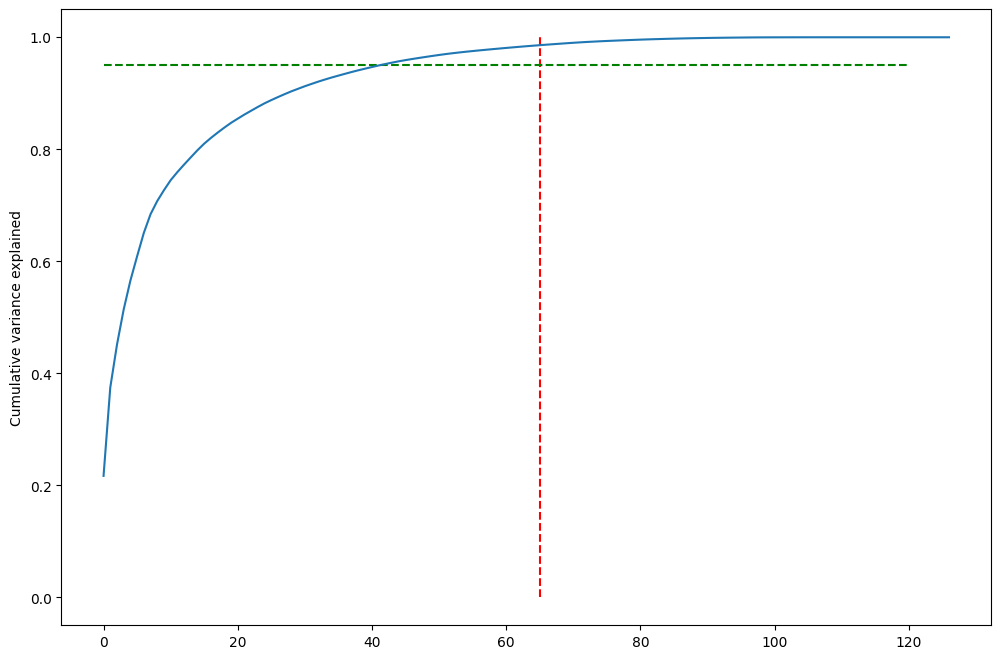

In [61]:
# scree plot to visualize variance
var = np.cumsum(pca.explained_variance_ratio_)
fig = plt.figure(figsize=[12,8])
plt.vlines(x=65, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=120, xmin=0, colors="g", linestyles="--")
plt.plot(var)
plt.ylabel("Cumulative variance explained")
plt.show()

It looks like with about 65 parameters, PCA can cover almost 95% of the data.

In [62]:
#Initiate incrementalPCA with 65 parameters
pca = IncrementalPCA(n_components=65)

# Fit and transform X_train
X_train_pca = pca.fit_transform(X_train)

# Transform X_test
X_test_pca = pca.transform(X_test)

X_train_pca.shape

(30702, 65)

## Logistic regression with PCA

In [63]:
# Hyperparameters
# C = Inverse of regularization strength
params = {"C": [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

# Creating KFold with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=42)

log_reg_pca = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring = 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

In [64]:
# Fit the model
log_reg_pca.fit(X_train_pca, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [65]:
# cross validation results
pd.DataFrame(log_reg_pca.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.049933,0.012567,0.002386,0.000370,0.001,{'C': 0.001},0.729197,0.733268,0.725244,0.741368,0.749511,0.735718,0.008722,7,0.737266,0.734253,0.734142,0.735567,0.742733,0.736792,0.003178
1,0.203426,0.026289,0.011104,0.005510,0.010,{'C': 0.01},0.774792,0.781306,0.773779,0.785668,0.785505,0.780210,0.005094,6,0.780872,0.779610,0.780433,0.779253,0.782225,0.780478,0.001045
2,0.117788,0.026932,0.003284,0.001801,0.100,{'C': 0.1},0.820713,0.825436,0.822801,0.825896,0.821173,0.823204,0.002132,5,0.824071,0.822483,0.822856,0.823752,0.824892,0.823611,0.000862
3,0.278210,0.184858,0.002801,0.000668,1.000,{'C': 1},0.838463,0.848885,0.841857,0.844137,0.837459,0.842160,0.004123,4,0.843410,0.841171,0.842521,0.843172,0.844394,0.842934,0.001067
4,0.324881,0.109336,0.003760,0.002589,10.000,{'C': 10},0.843837,0.853607,0.847557,0.851303,0.844137,0.848088,0.003867,3,0.850291,0.847319,0.849361,0.850379,0.849972,0.849464,0.001131
5,0.502845,0.248622,0.003139,0.001273,100.000,{'C': 100},0.845791,0.853118,0.846743,0.849837,0.846580,0.848414,0.002728,2,0.850454,0.847970,0.849035,0.849972,0.850501,0.849586,0.000965
6,0.525644,0.238038,0.004243,0.001819,1000.000,{'C': 1000},0.846279,0.854258,0.848046,0.850489,0.847231,0.849261,0.002862,1,0.851228,0.847685,0.849809,0.850175,0.850623,0.849904,0.001206


In [66]:
# print best hyperparameters
print("Best Accuracy: ", log_reg_pca.best_score_)
print("Best hyperparameters: ", log_reg_pca.best_params_)

Best Accuracy:  0.8492605688152519
Best hyperparameters:  {'C': 1000}


### Evaluate on test data

In [67]:
# predict churn on test data
y_pred = log_reg_pca.predict(X_test_pca)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

#Print metrics
print_metrics(y_test, y_pred, cm)
# check sensitivity and specificity

[[3210  675]
 [  69  245]]
Accuracy :  0.8228149559418909
Sensitivity :  0.7802547770700637
Specificity :  0.8262548262548263


## Decision Tree Classifier With PCA

In [68]:
# Hyperparameters
params = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}

# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=42)


dt = DecisionTreeClassifier(random_state=42)

dt_pca = GridSearchCV(estimator = dt, 
                           param_grid = params, 
                           scoring= 'accuracy',
                           cv = folds, 
                           verbose = 1)

In [69]:
# Fit the model
dt_pca.fit(X_train_pca, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='accuracy', verbose=1)

In [70]:
# cross validation results
pd.DataFrame(dt_pca.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.002422,0.019354,0.002130,0.000342,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.803289,0.799544,0.800651,0.814169,0.801140,0.803759,0.005346,5
1,0.983890,0.019051,0.002100,0.000423,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.803289,0.799544,0.800651,0.814169,0.801140,0.803759,0.005346,5
2,0.953824,0.026870,0.002248,0.000311,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.802801,0.799381,0.799349,0.812704,0.799837,0.802814,0.005108,7
3,0.926267,0.023061,0.001772,0.000094,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.802801,0.799381,0.799349,0.812704,0.799837,0.802814,0.005108,7
4,1.517901,0.024511,0.002166,0.000258,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.831135,0.836020,0.826221,0.834691,0.826710,0.830955,0.004002,1
5,1.515517,0.016081,0.001904,0.000134,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.831135,0.836020,0.826221,0.834691,0.826710,0.830955,0.004002,1
6,1.396018,0.011978,0.001988,0.000163,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.815665,0.818271,0.824267,0.828664,0.816775,0.820729,0.004956,3
7,1.407808,0.009765,0.001944,0.000117,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.815665,0.818271,0.824267,0.828664,0.816775,0.820729,0.004956,3


In [71]:
# print best hyperparameters
print("Best Accuracy: ", dt_pca.best_score_)
print("Best hyperparameters: ", dt_pca.best_params_)

Best Accuracy:  0.8309554672577703
Best hyperparameters:  {'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 50}


### Evaluate on test data

In [72]:
# predict churn on test data
y_pred = dt_pca.predict(X_test_pca)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

#Print metrics
print_metrics(y_test, y_pred, cm)
# check sensitivity and specificity

[[3229  656]
 [ 118  196]]
Accuracy :  0.8156703977137414
Sensitivity :  0.6242038216560509
Specificity :  0.8311454311454312


## Random Forest With PCA

In [73]:
# Hyperparameters
params = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [10, 20, 50], 
    'max_features': [10, 20]
}

# Creating KFold object with 4 splits
folds = KFold(n_splits=4, shuffle=True, random_state=42)

# Create a based model
rf = RandomForestClassifier(random_state=42)


rf_pca = GridSearchCV(estimator = rf, 
                           param_grid = params, 
                           cv = folds,
                           n_jobs = -1,
                           verbose = 1, 
                           scoring= 'accuracy',
                           return_train_score=True)

In [74]:
# Fit the model
rf_pca.fit(X_train_pca, y_train)

Fitting 4 folds for each of 48 candidates, totalling 192 fits


GridSearchCV(cv=KFold(n_splits=4, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5), 'max_features': [10, 20],
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50),
                         'n_estimators': [10, 20, 50]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [75]:
# cross validation results
pd.DataFrame(rf_pca.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,2.119804,0.081331,0.011300,0.003655,5,10,50,50,10,"{'max_depth': 5, 'max_features': 10, 'min_samp...",0.818134,0.816571,0.817590,0.817720,0.817504,0.000575,45,0.833579,0.828325,0.823077,0.830156,0.828784,0.003797
1,4.381149,0.788438,0.016232,0.003414,5,10,50,50,20,"{'max_depth': 5, 'max_features': 10, 'min_samp...",0.831292,0.829729,0.824365,0.829446,0.828708,0.002604,37,0.846608,0.841266,0.831459,0.838798,0.839533,0.005450
2,10.519950,1.848039,0.037972,0.017464,5,10,50,50,50,"{'max_depth': 5, 'max_features': 10, 'min_samp...",0.837155,0.837546,0.840782,0.837785,0.838317,0.001441,25,0.849301,0.850256,0.841751,0.849307,0.847654,0.003430
3,2.338950,0.324049,0.012324,0.003833,5,10,50,100,10,"{'max_depth': 5, 'max_features': 10, 'min_samp...",0.818134,0.816571,0.817590,0.817720,0.817504,0.000575,45,0.833579,0.828325,0.823077,0.830156,0.828784,0.003797
4,3.421247,0.008150,0.014282,0.003362,5,10,50,100,20,"{'max_depth': 5, 'max_features': 10, 'min_samp...",0.831292,0.829729,0.824365,0.829446,0.828708,0.002604,37,0.846608,0.841266,0.831459,0.838798,0.839533,0.005450
5,9.049621,0.715879,0.030167,0.006064,5,10,50,100,50,"{'max_depth': 5, 'max_features': 10, 'min_samp...",0.837155,0.837546,0.840782,0.837785,0.838317,0.001441,25,0.849301,0.850256,0.841751,0.849307,0.847654,0.003430
6,1.877482,0.280408,0.010995,0.002133,5,10,100,50,10,"{'max_depth': 5, 'max_features': 10, 'min_samp...",0.807843,0.814226,0.808469,0.814723,0.811315,0.003172,47,0.826240,0.827195,0.813132,0.826551,0.823280,0.005869
7,3.077151,0.085067,0.013198,0.001919,5,10,100,50,20,"{'max_depth': 5, 'max_features': 10, 'min_samp...",0.824127,0.831292,0.822020,0.826840,0.826070,0.003466,43,0.839660,0.840745,0.827941,0.840144,0.837123,0.005315
8,11.703573,2.866553,0.055712,0.023247,5,10,100,50,50,"{'max_depth': 5, 'max_features': 10, 'min_samp...",0.836113,0.839891,0.837524,0.836482,0.837502,0.001473,27,0.846956,0.847216,0.840535,0.847614,0.845580,0.002922
9,1.619005,0.122760,0.007988,0.001906,5,10,100,100,10,"{'max_depth': 5, 'max_features': 10, 'min_samp...",0.807843,0.814226,0.808469,0.814723,0.811315,0.003172,47,0.826240,0.827195,0.813132,0.826551,0.823280,0.005869


In [76]:
# print best hyperparameters
print("Best Acccuracy: ", rf_pca.best_score_)
print("Best hyperparameters: ", rf_pca.best_params_)

Best Acccuracy:  0.8774998642072332
Best hyperparameters:  {'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 50, 'min_samples_split': 50, 'n_estimators': 50}


### Evaluate on test data

In [77]:
# predict churn on test data
y_pred = rf_pca.predict(X_test_pca)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

#Print metrics
print_metrics(y_test, y_pred, cm)
# check sensitivity and specificity

[[3425  460]
 [ 107  207]]
Accuracy :  0.8649678494879733
Sensitivity :  0.6592356687898089
Specificity :  0.8815958815958816


## Gradient Boosting with PCA

In [78]:
gb_pca = GradientBoostingClassifier(random_state=42)

# Fit the model
gb_pca.fit(X_train_pca, y_train)

GradientBoostingClassifier(random_state=42)

### Evaluate on test data

In [79]:
# predict churn on test data
y_pred = gb_pca.predict(X_test_pca)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

#Print metrics
print_metrics(y_test, y_pred, cm)
# check sensitivity and specificity

[[3329  556]
 [  89  225]]
Accuracy :  0.8463919980947845
Sensitivity :  0.7165605095541401
Specificity :  0.8568854568854569


## Extreme Gradient Boosting with PCA

In [80]:
xgb_pca = xgb.XGBClassifier(n_jobs = -1,objective = 'binary:logistic')

# Fit the model
xgb_pca.fit(X_train_pca, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, random_state=None, ...)

### Evaluate on test data

In [81]:
# predict churn on test data
y_pred = xgb_pca.predict(X_test_pca)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

#Print metrics
print_metrics(y_test, y_pred, cm)
# check sensitivity and specificity

[[3614  271]
 [ 138  176]]
Accuracy :  0.9025958561562277
Sensitivity :  0.5605095541401274
Specificity :  0.9302445302445302


## Logistic regression without PCA

In [82]:
# Hyperparameters
# C = Inverse of regularization strength
params = {"C": [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

# Creating KFold with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=42)

log_reg = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring = 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

In [83]:
# Fit the model
log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [84]:
# cross validation results
pd.DataFrame(log_reg.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.128202,0.027310,0.009172,0.002816,0.001,{'C': 0.001},0.729034,0.733268,0.725407,0.741694,0.749349,0.735750,0.008700,7,0.737511,0.734620,0.734305,0.735445,0.742814,0.736939,0.003143
1,0.175337,0.021007,0.007652,0.002832,0.010,{'C': 0.01},0.774630,0.780817,0.773616,0.785993,0.785505,0.780112,0.005224,6,0.780791,0.779488,0.780840,0.779537,0.782102,0.780552,0.000970
2,0.306290,0.128550,0.007851,0.003832,0.100,{'C': 0.1},0.820225,0.826738,0.823290,0.825733,0.822150,0.823627,0.002366,5,0.823989,0.822605,0.823182,0.823996,0.824892,0.823733,0.000782
3,0.454027,0.119923,0.007379,0.002933,1.000,{'C': 1},0.838788,0.849536,0.840879,0.844951,0.837296,0.842290,0.004445,4,0.843614,0.841049,0.842480,0.843580,0.844027,0.842950,0.001080
4,0.511614,0.090070,0.006436,0.001066,10.000,{'C': 10},0.843837,0.855561,0.847394,0.850489,0.843322,0.848121,0.004536,3,0.850617,0.848459,0.848994,0.849157,0.849890,0.849423,0.000752
5,0.784066,0.125868,0.004691,0.000541,100.000,{'C': 100},0.844814,0.855398,0.846580,0.851954,0.844137,0.848577,0.004377,2,0.850617,0.848581,0.849279,0.851030,0.851356,0.850173,0.001064
6,0.805915,0.274024,0.007390,0.002425,1000.000,{'C': 1000},0.846116,0.855561,0.847231,0.852117,0.844625,0.849130,0.004081,1,0.850617,0.847848,0.849279,0.851071,0.851559,0.850075,0.001348


In [85]:
# print best hyperparameters
print("Best Accuracy: ", log_reg.best_score_)
print("Best hyperparameters: ", log_reg.best_params_)

Best Accuracy:  0.8491302385260175
Best hyperparameters:  {'C': 1000}


### Evaluate on test data

In [86]:
# predict churn on test data
y_pred = log_reg.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

#Print metrics
print_metrics(y_test, y_pred, cm)
# check sensitivity and specificity

[[3218  667]
 [  70  244]]
Accuracy :  0.8244820195284591
Sensitivity :  0.7770700636942676
Specificity :  0.8283140283140283


## Decision Tree Classifier Without PCA

In [87]:
# Hyperparameters
params = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}

# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=42)


dtc = DecisionTreeClassifier(random_state=42)

dt = GridSearchCV(estimator = dt, 
                           param_grid = params, 
                           scoring= 'accuracy',
                           cv = folds, 
                           verbose = 1)

In [88]:
# Fit the model
dt.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='accuracy', verbose=1)

In [89]:
# cross validation results
pd.DataFrame(dt.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.924666,0.024774,0.003854,0.000655,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.870542,0.872822,0.876059,0.878827,0.873127,0.874275,0.002873,5
1,0.899489,0.036127,0.003752,0.000627,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.870542,0.872822,0.876059,0.878827,0.873127,0.874275,0.002873,5
2,0.891399,0.013484,0.003262,0.000277,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.870705,0.873148,0.875570,0.879316,0.871173,0.873982,0.003172,7
3,0.883300,0.006047,0.003120,0.000073,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.870705,0.873148,0.875570,0.879316,0.871173,0.873982,0.003172,7
4,1.569640,0.012464,0.003588,0.000308,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.887315,0.897248,0.896254,0.898208,0.890717,0.893948,0.004214,1
5,1.612380,0.048798,0.004356,0.000998,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.887315,0.897248,0.896254,0.898208,0.890717,0.893948,0.004214,1
6,1.519945,0.050269,0.003624,0.000341,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.881941,0.887803,0.887459,0.893811,0.881759,0.886555,0.004457,3
7,1.478658,0.024628,0.004050,0.001247,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.881941,0.887803,0.887459,0.893811,0.881759,0.886555,0.004457,3


In [90]:
# print best hyperparameters
print("Best Accuracy: ", dt.best_score_)
print("Best hyperparameters: ", dt.best_params_)

Best Accuracy:  0.8939483855773682
Best hyperparameters:  {'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 50}


### Evaluate on test data

In [91]:
# predict churn on test data
y_pred = dt.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

#Print metrics
print_metrics(y_test, y_pred, cm)
# check sensitivity and specificity

[[3442  443]
 [  90  224]]
Accuracy :  0.8730650154798761
Sensitivity :  0.7133757961783439
Specificity :  0.885971685971686


## Random Forest Without PCA

In [92]:
# Hyperparameters
params = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [10, 20, 50], 
    'max_features': [10, 20]
}

# Creating KFold object with 4 splits
folds = KFold(n_splits=4, shuffle=True, random_state=42)

# Create a based model
rfc = RandomForestClassifier(random_state=42)


rf = GridSearchCV(estimator = rf, 
                           param_grid = params, 
                           cv = folds,
                           n_jobs = -1,
                           verbose = 1, 
                           scoring= 'accuracy',
                           return_train_score=True)

In [93]:
# Fit the model
rf.fit(X_train, y_train)

Fitting 4 folds for each of 48 candidates, totalling 192 fits


GridSearchCV(cv=KFold(n_splits=4, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5), 'max_features': [10, 20],
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50),
                         'n_estimators': [10, 20, 50]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [94]:
# cross validation results
pd.DataFrame(rf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,1.423729,0.223441,0.016283,0.002904,5,10,50,50,10,"{'max_depth': 5, 'max_features': 10, 'min_samp...",0.876759,0.884966,0.891466,0.881564,0.883689,0.005354,45,0.889777,0.890254,0.887871,0.890433,0.889584,0.001018
1,2.597811,0.337784,0.020235,0.002272,5,10,50,50,20,"{'max_depth': 5, 'max_features': 10, 'min_samp...",0.880667,0.889917,0.896156,0.883909,0.887662,0.005921,37,0.892339,0.893338,0.891953,0.895123,0.893188,0.001226
2,5.813615,0.298629,0.036088,0.009004,5,10,50,50,50,"{'max_depth': 5, 'max_features': 10, 'min_samp...",0.880667,0.890047,0.896678,0.880782,0.887043,0.006740,39,0.894076,0.892817,0.892778,0.893429,0.893275,0.000530
3,1.567048,0.225384,0.016400,0.002662,5,10,50,100,10,"{'max_depth': 5, 'max_features': 10, 'min_samp...",0.876759,0.884966,0.891466,0.881564,0.883689,0.005354,45,0.889777,0.890254,0.887871,0.890433,0.889584,0.001018
4,1.915695,0.162826,0.023540,0.007239,5,10,50,100,20,"{'max_depth': 5, 'max_features': 10, 'min_samp...",0.880667,0.889917,0.896156,0.883909,0.887662,0.005921,37,0.892339,0.893338,0.891953,0.895123,0.893188,0.001226
5,5.400716,0.476486,0.031400,0.003673,5,10,50,100,50,"{'max_depth': 5, 'max_features': 10, 'min_samp...",0.880667,0.890047,0.896678,0.880782,0.887043,0.006740,39,0.894076,0.892817,0.892778,0.893429,0.893275,0.000530
6,1.058234,0.094129,0.013002,0.000980,5,10,100,50,10,"{'max_depth': 5, 'max_features': 10, 'min_samp...",0.877540,0.885227,0.885081,0.878827,0.881669,0.003515,47,0.886650,0.888908,0.884657,0.887436,0.886913,0.001534
7,1.889900,0.023042,0.016998,0.004792,5,10,100,50,20,"{'max_depth': 5, 'max_features': 10, 'min_samp...",0.880406,0.887051,0.892899,0.877915,0.884568,0.005855,43,0.890863,0.888908,0.891041,0.889087,0.889975,0.000981
8,4.990101,0.432020,0.034505,0.004841,5,10,100,50,50,"{'max_depth': 5, 'max_features': 10, 'min_samp...",0.883142,0.889917,0.894853,0.877785,0.886424,0.006493,41,0.893338,0.888691,0.889260,0.889912,0.890300,0.001806
9,0.984288,0.016726,0.014291,0.003052,5,10,100,100,10,"{'max_depth': 5, 'max_features': 10, 'min_samp...",0.877540,0.885227,0.885081,0.878827,0.881669,0.003515,47,0.886650,0.888908,0.884657,0.887436,0.886913,0.001534


In [95]:
# print best hyperparameters
print("Best Acccuracy: ", rf.best_score_)
print("Best hyperparameters: ", rf.best_params_)

Best Acccuracy:  0.9095499021443374
Best hyperparameters:  {'max_depth': 10, 'max_features': 20, 'min_samples_leaf': 50, 'min_samples_split': 50, 'n_estimators': 50}


### Evaluate on test data

In [96]:
# predict churn on test data
y_pred = rf.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

#Print metrics
print_metrics(y_test, y_pred, cm)
# check sensitivity and specificity

[[3537  348]
 [  80  234]]
Accuracy :  0.8980709692783996
Sensitivity :  0.7452229299363057
Specificity :  0.9104247104247104


## Gradient Boosting without PCA

In [97]:
gb = GradientBoostingClassifier(random_state=42)

# Fit the model
gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

### Evaluate on test data

In [98]:
# predict churn on test data
y_pred = gb.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

#Print metrics
print_metrics(y_test, y_pred, cm)
# check sensitivity and specificity

[[3588  297]
 [  89  225]]
Accuracy :  0.908073350797809
Sensitivity :  0.7165605095541401
Specificity :  0.9235521235521236


## Extreme Gradient Boosting without PCA

In [99]:
xgb = xgb.XGBClassifier(n_jobs = -1,objective = 'binary:logistic')

# Fit the model
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, random_state=None, ...)

### Evaluate on test data

In [100]:
# predict churn on test data
y_pred = xgb.predict(X_test)

# create confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

#Print metrics
print_metrics(y_test, y_pred, cm)
# check sensitivity and specificity

[[3741  144]
 [ 150  164]]
Accuracy :  0.9299833293641343
Sensitivity :  0.5222929936305732
Specificity :  0.962934362934363


**Extreme Gradient Boosting without PCA seems to be the best performing model on the test dataset.**

**Observations:**
- Extreme Gradient Boosting without PCA seems to be the best performing model.
- Overall model without PCA seem to be outperforming PCA based models

In [101]:
# SOme important features affecting churn according to XGBoost model
imp_df = pd.DataFrame({
    "Varname": X_test.columns,
    "Imp": xgb.feature_importances_
})

imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
80,total_ic_mou_8,0.178583
65,loc_ic_mou_8,0.085499
14,roam_og_mou_8,0.073822
104,av_rech_amt_data_8,0.030139
95,total_rech_amt_8,0.028412
113,monthly_2g_8,0.023086
111,monthly_2g_6,0.020111
101,last_day_rch_amt_8,0.016479
112,monthly_2g_7,0.016067
119,monthly_3g_8,0.015958


Top features affecting churn are as follows:

1. total_ic_mou_8
2. loc_ic_mou_8
3. roam_og_mou_8	
4. av_rech_amt_data_8
5. monthly_2g_6

### Insights on Factors Affecting Churn

Based on the top features affecting churn identified from the analysis, here are the insights into customer behavior and the factors leading to churn:

#### 1. **total_ic_mou_8** (Total Incoming Calls Minutes of Usage in Month 8)

**Insight:**
This feature represents the total duration of incoming calls a customer received during the eighth month.

- **High Usage**: Customers with high incoming call minutes may indicate that they are actively engaged and rely heavily on the network for communication. However, if these customers experience poor call quality, frequent call drops, or network issues, they may become dissatisfied and consider switching to a competitor offering better service reliability.
  
- **Low Usage**: Conversely, customers with low incoming call minutes might indicate reduced engagement or a shift to alternative communication methods such as messaging apps or VoIP services. This reduced dependency on traditional call services could lead them to opt for cheaper plans or discontinue services altogether.

#### 2. **loc_ic_mou_8** (Local Incoming Calls Minutes of Usage in Month 8)

**Insight:**
This feature measures the total duration of local incoming calls in the eighth month.

- **High Usage**: A high volume of local incoming calls suggests that the customer has a strong local network and relies on local communication. Any issues like local network congestion or higher call rates could prompt these customers to churn.
  
- **Low Usage**: Low local incoming call usage may indicate that the customer is not utilizing local call services extensively, possibly due to better alternatives or lack of need. These customers might consider discontinuing services if they don't see value in maintaining their current plans.


#### 3. **roam_og_mou_8** (Roaming Outgoing Calls Minutes of Usage in Month 8)

**Insight:**
This feature indicates the total minutes spent on outgoing calls while roaming during the eighth month.

- **High Usage**: Customers with high roaming outgoing call minutes are likely traveling frequently and depend on the network's roaming services. If roaming charges are high or service quality during roaming is poor, these customers may become dissatisfied and switch to providers offering better and more affordable roaming options.
  
- **Low Usage**: Low roaming usage may not significantly impact churn directly. However, understanding this can help in tailoring services that focus more on local usage patterns for these customers.


#### 4. **av_rech_amt_data_8** (Average Recharge Amount for Data in Month 8)

**Insight:**
This feature represents the average amount a customer spends on data recharges in the eighth month.

- **High Expenditure**: Customers spending more on data may indicate heavy data usage. If these customers feel that the data plans are not cost-effective or the data speeds are inadequate, they might look for better deals elsewhere.
  
- **Low Expenditure**: Low spending on data could suggest either minimal data usage or dissatisfaction with current data services leading to reduced usage. These customers might churn if they find plans that better suit their usage and budget.


#### 5. **monthly_2g_6** (Monthly 2G Data Usage in Month 6)

**Insight:**
This feature captures the amount of 2G data used by the customer during the sixth month.

- **High Usage**: High 2G usage may indicate that the customer is in areas with limited 3G/4G coverage or is using outdated devices. Slow internet speeds associated with 2G could lead to frustration, especially if better options are available from competitors.
  
- **Low Usage**: Low 2G usage might suggest that the customer has transitioned to faster networks or is not utilizing data services extensively. This could be a precursor to churn if the customer feels their current plan does not meet their needs.


### Business Recommendations

- **Personalized Offers**: Utilize the insights from these features to create personalized plans and offers that cater to the specific needs and usage patterns of different customer segments.
  
- **Service Quality Enhancement**: Focus on improving network quality, reducing call drops, and increasing data speeds to enhance overall customer satisfaction.

- **Customer Engagement**: Proactively engage with customers through feedback surveys, customer support, and loyalty programs to identify and address issues before they lead to churn.

- **Competitive Pricing**: Ensure that pricing for calls, data, and roaming services are competitive and provide clear value to the customers to prevent them from switching to competitors.
